#EKE


In this notebook I calculate EKE from differnet runs to see whether looking at the effects of stiring my messoscale eddies is a question worth studying or not. Runs 12,13,14.

These runs have uniform vertical diffusivity, REDI scheme (GM_background_K=0.0) and linear initial profiles of T, S, and tracers.

Isopycnal diffusivities (GM_isopycK) in REDI are:

Run12 : 10.0 $m^2s^{-1}$,

Run13 : 1.0 $m^2s^{-1}$,

Run14 : 1.E-01$m^2s^{-1}$,

For all runs: 

KvT = KvS = E-5 $m^2s^{-1}$

KvTr1 = E-5 $m^2s^{-1}$

KvTr2 = E-3 $m^2s^{-1}$

KvTr3 = E-1 $m^2s^{-1}$

Background horizontal diffusivity (GM_Kmin_horiz) E-5 $m^2s^{-1}$ (for stability)


In [62]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl


In [63]:
# Get field from MITgcm netCDF output

def getField(statefile, fieldname):
    ''' :statefile : string with /path/to/state.0000000000.t001.nc
    :fieldname : string with the variable name as written on the netCDF file ('Temp', 'S','Eta', etc.)'''
    
    StateOut = Dataset(statefile)
    
    Fld = StateOut.variables[fieldname][:]
    
    shFld = np.shape(Fld)
    
        
    if len(shFld) == 2:
        
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1])) # reshape to pcolor order
        return Fld2 
    
    elif len(shFld) == 3:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2])) # reshape to pcolor order
        return Fld2
        
    elif len(shFld) == 4:
        
        Fld2 = np.zeros((shFld[0],shFld[1],shFld[2],shFld[3])) 
        Fld2 = np.reshape(Fld,(shFld[0],shFld[1],shFld[2],shFld[3])) # reshape to pcolor order
        return Fld2
        
    else:
        
        print (' Check size of field ')
    
    


In [64]:
def unstagger(ugrid, vgrid):
    """Interpolate u and v component values to values at grid cell centres.

    The shapes of the returned arrays are 1 less than those of
    the input arrays in the y and x dimensions.

    :arg ugrid: u velocity component values with axes (..., y, x)
    :type ugrid: :py:class:`numpy.ndarray`

    :arg vgrid: v velocity component values with axes (..., y, x)
    :type vgrid: :py:class:`numpy.ndarray`

    :returns u, v: u and v component values at grid cell centres
    :rtype: 2-tuple of :py:class:`numpy.ndarray`
    """
    u = np.add(ugrid[..., :-1], ugrid[..., 1:]) / 2
    v = np.add(vgrid[..., :-1, :], vgrid[..., 1:, :]) / 2
    return u[..., 1:, :], v[..., 1:]


In [65]:
filename1A='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/state.0000000000.glob.nc'

filename2A='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/grid.glob.nc'

filename3A='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run12/ptracers.0000000000.glob.nc'

filename1B='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/state.0000000000.glob.nc'

filename2B='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/grid.glob.nc'

filename3B='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run13/ptracers.0000000000.glob.nc'

filename1C='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/state.0000000000.glob.nc'

filename2C='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/grid.glob.nc'

filename3C='/ocean/kramosmu/MITgcm/CanyonUpwelling/360x360x90_8Tr_LinProfiles_BarkleyHyd_GMREDI/run14/ptracers.0000000000.glob.nc'



In [66]:
bathy = getField(filename2A, 'Depth')
xc    = getField(filename2A, 'XC') # x coords tracer cells
yc    = getField(filename2A, 'YC') # y coords tracer cells

StateOut = Dataset(filename1A)
z     = StateOut.variables['Z']



In [67]:
nt = 19 # number of output snapshots
nx = 360
ny = 360

In [68]:
# Get u and v and unstagger into same c grid
ugrid = getField(filename1A,'U')
vgrid = getField(filename1A,'V')

u2,v2 = unstagger(ugrid,vgrid)

       


In [69]:
# Nice cell center mask

hFacC = getField(filename2A,'HFacC') #(90,360,360)

hFacCmasked = np.ma.masked_values(hFacC, 0)

MASKhFacC = np.ma.getmask(hFacCmasked)




## Shelf-break depth


In [70]:
kk = 30 # SB
print ('Shelf-break depth is %f m' % (z[30]))

umeant = np.mean(u2,0)
vmeant = np.mean(v2,0)

umeant = np.ma.array(umeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
vmeant = np.ma.array(vmeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])



Shelf-break depth is -152.500000 m


In [71]:
#### Calculate EKE at different depths
kk = 30
EKE30 = np.zeros((ny-1,nx-1,nt))


for tt in range(0,19):
    
    umask = np.ma.array(u2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
    vmask = np.ma.array(v2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])

    # mask u'=u-umean and v'=v-vmean arrays
    ueddy = umask[:,:]-umeant[:,:]
    veddy = vmask[:,:]-vmeant[:,:]
    
    # EKE = 0.5(u'**+v'**)
    EKE =(ueddy**2 + veddy**2)/(2.0)
    EKE30[:,:,tt] = EKE
    

In [72]:
EKEmask = np.ma.getmask(EKE)
    



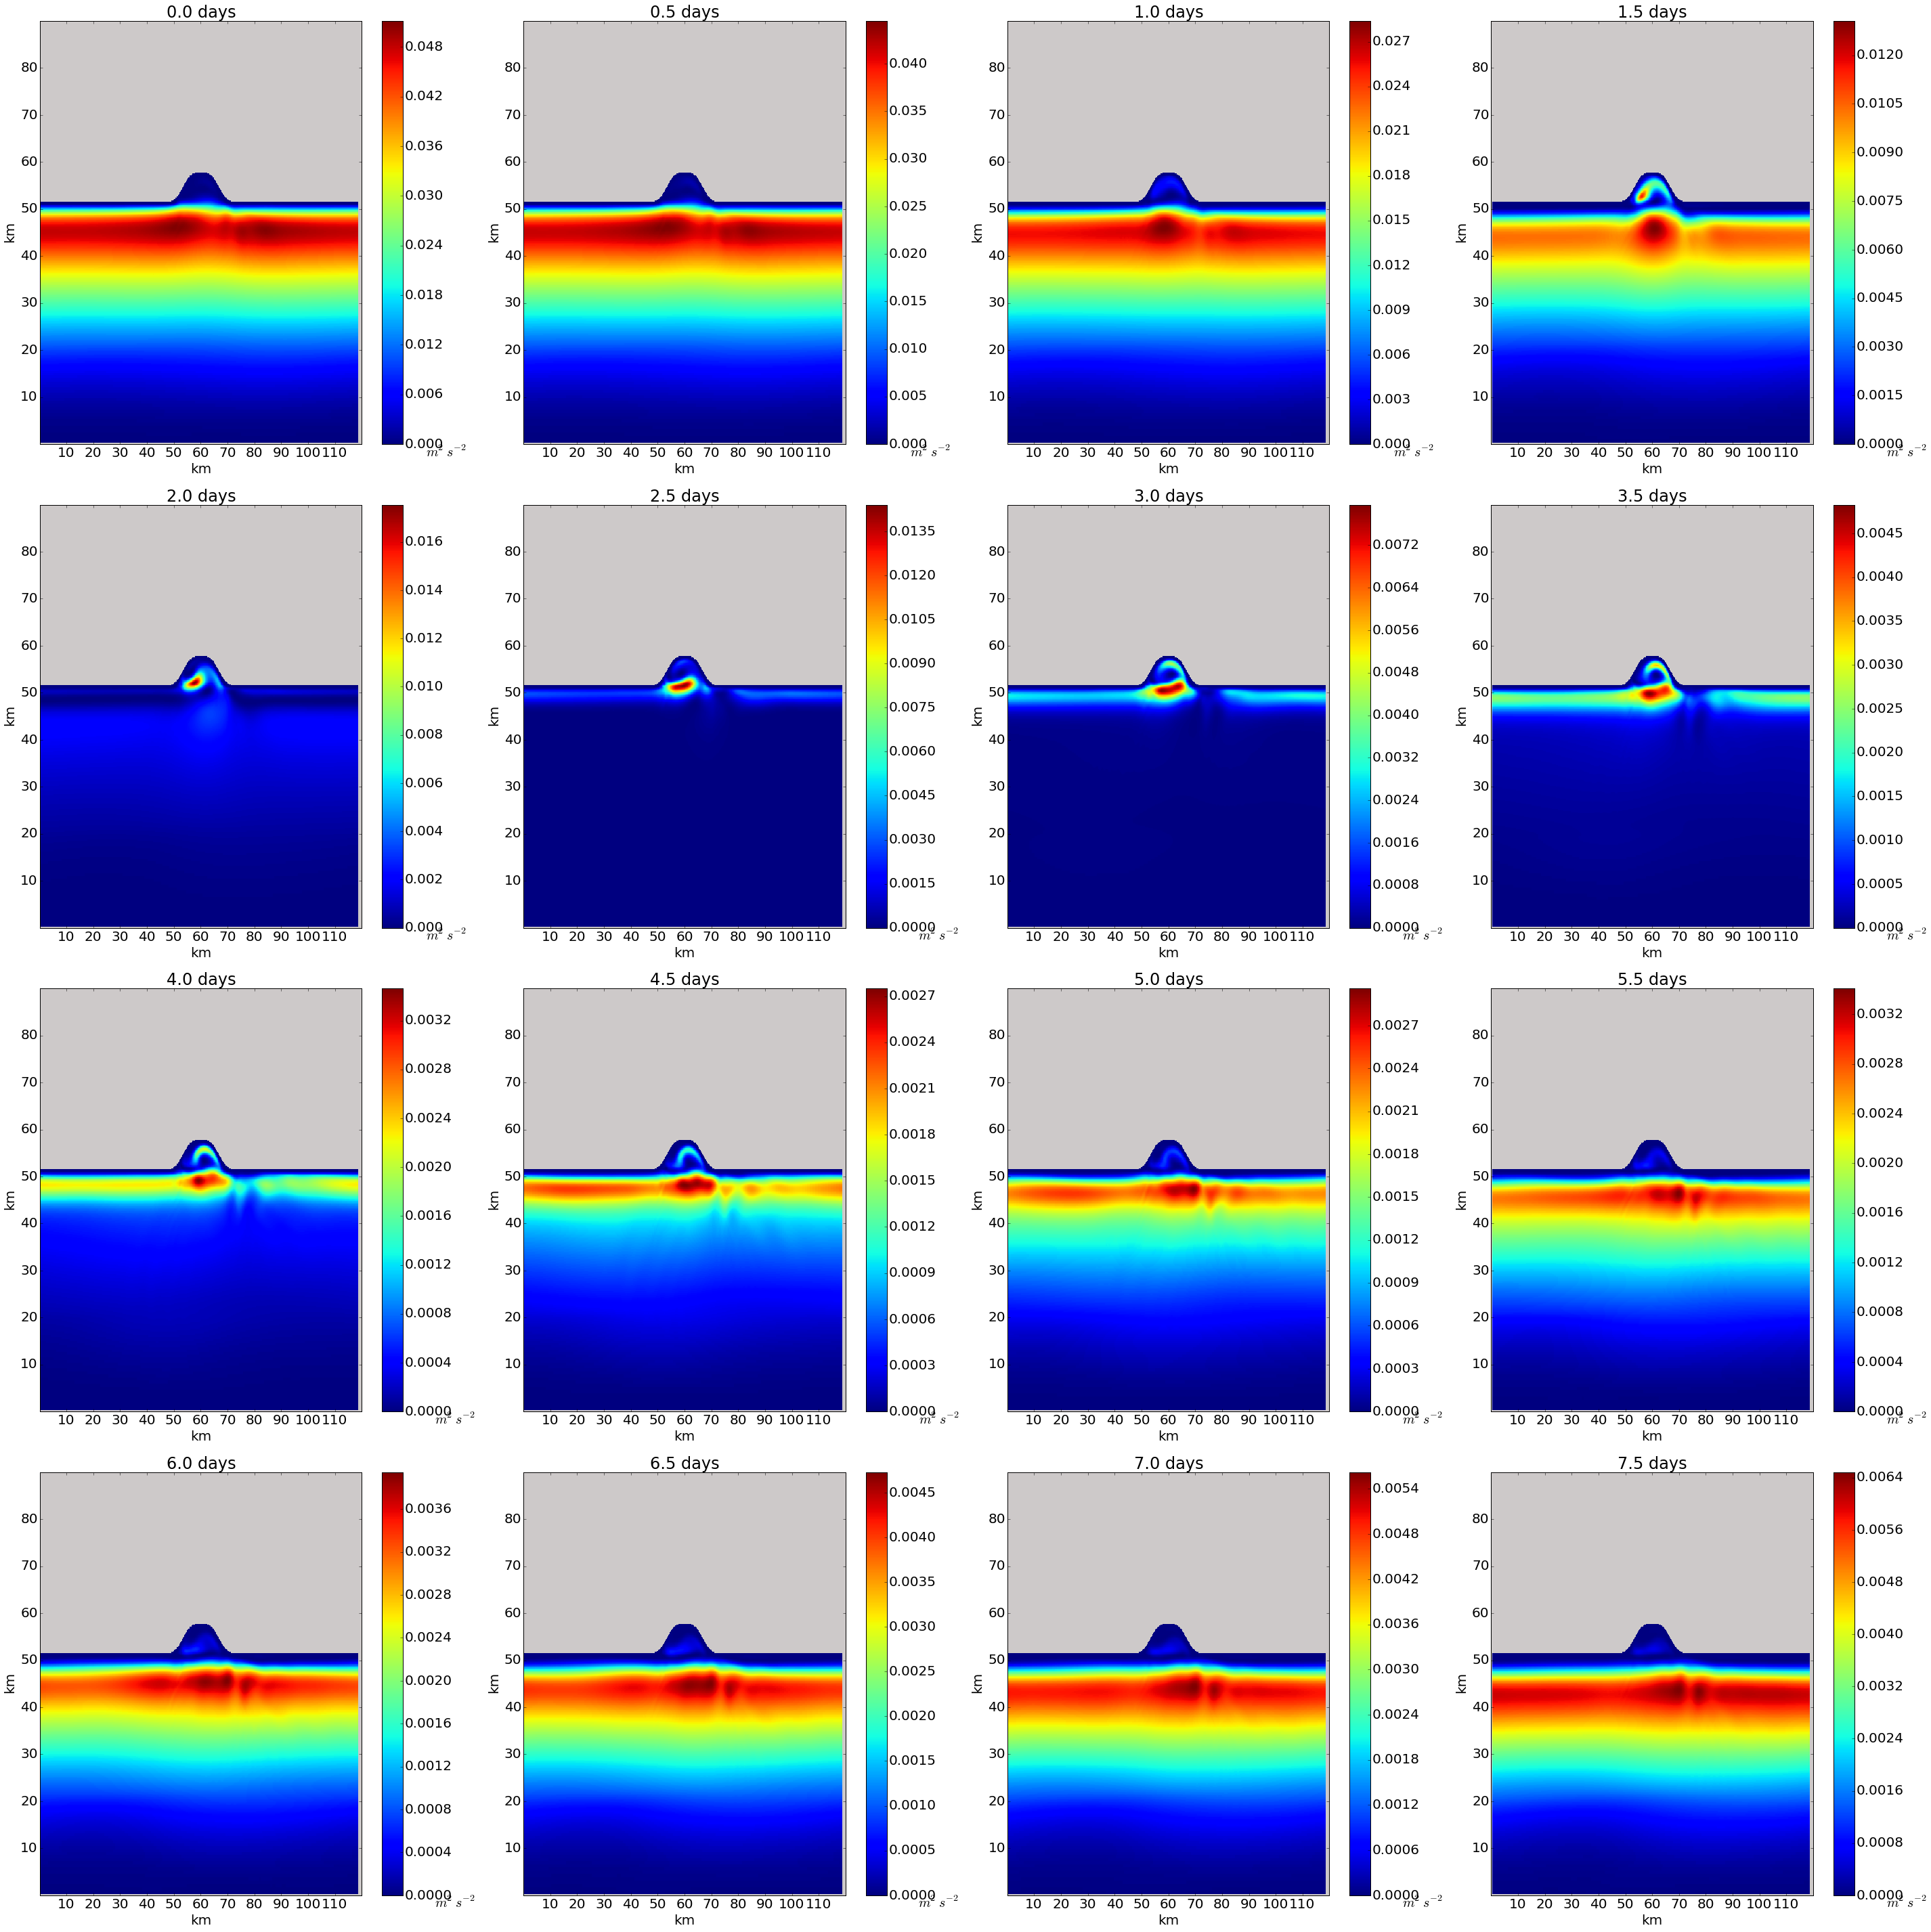

In [73]:
# PLOT EKE30

plt.rcParams.update({'font.size':20})

fig46=plt.figure(figsize=(40,40))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE30masked = np.ma.array(EKE30[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[:-1,:-1],yc[:-1,:-1],EKE30masked)
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
        plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

        plt.title("%1.1f days " % (tt/2.0))
        plt.tight_layout()
        

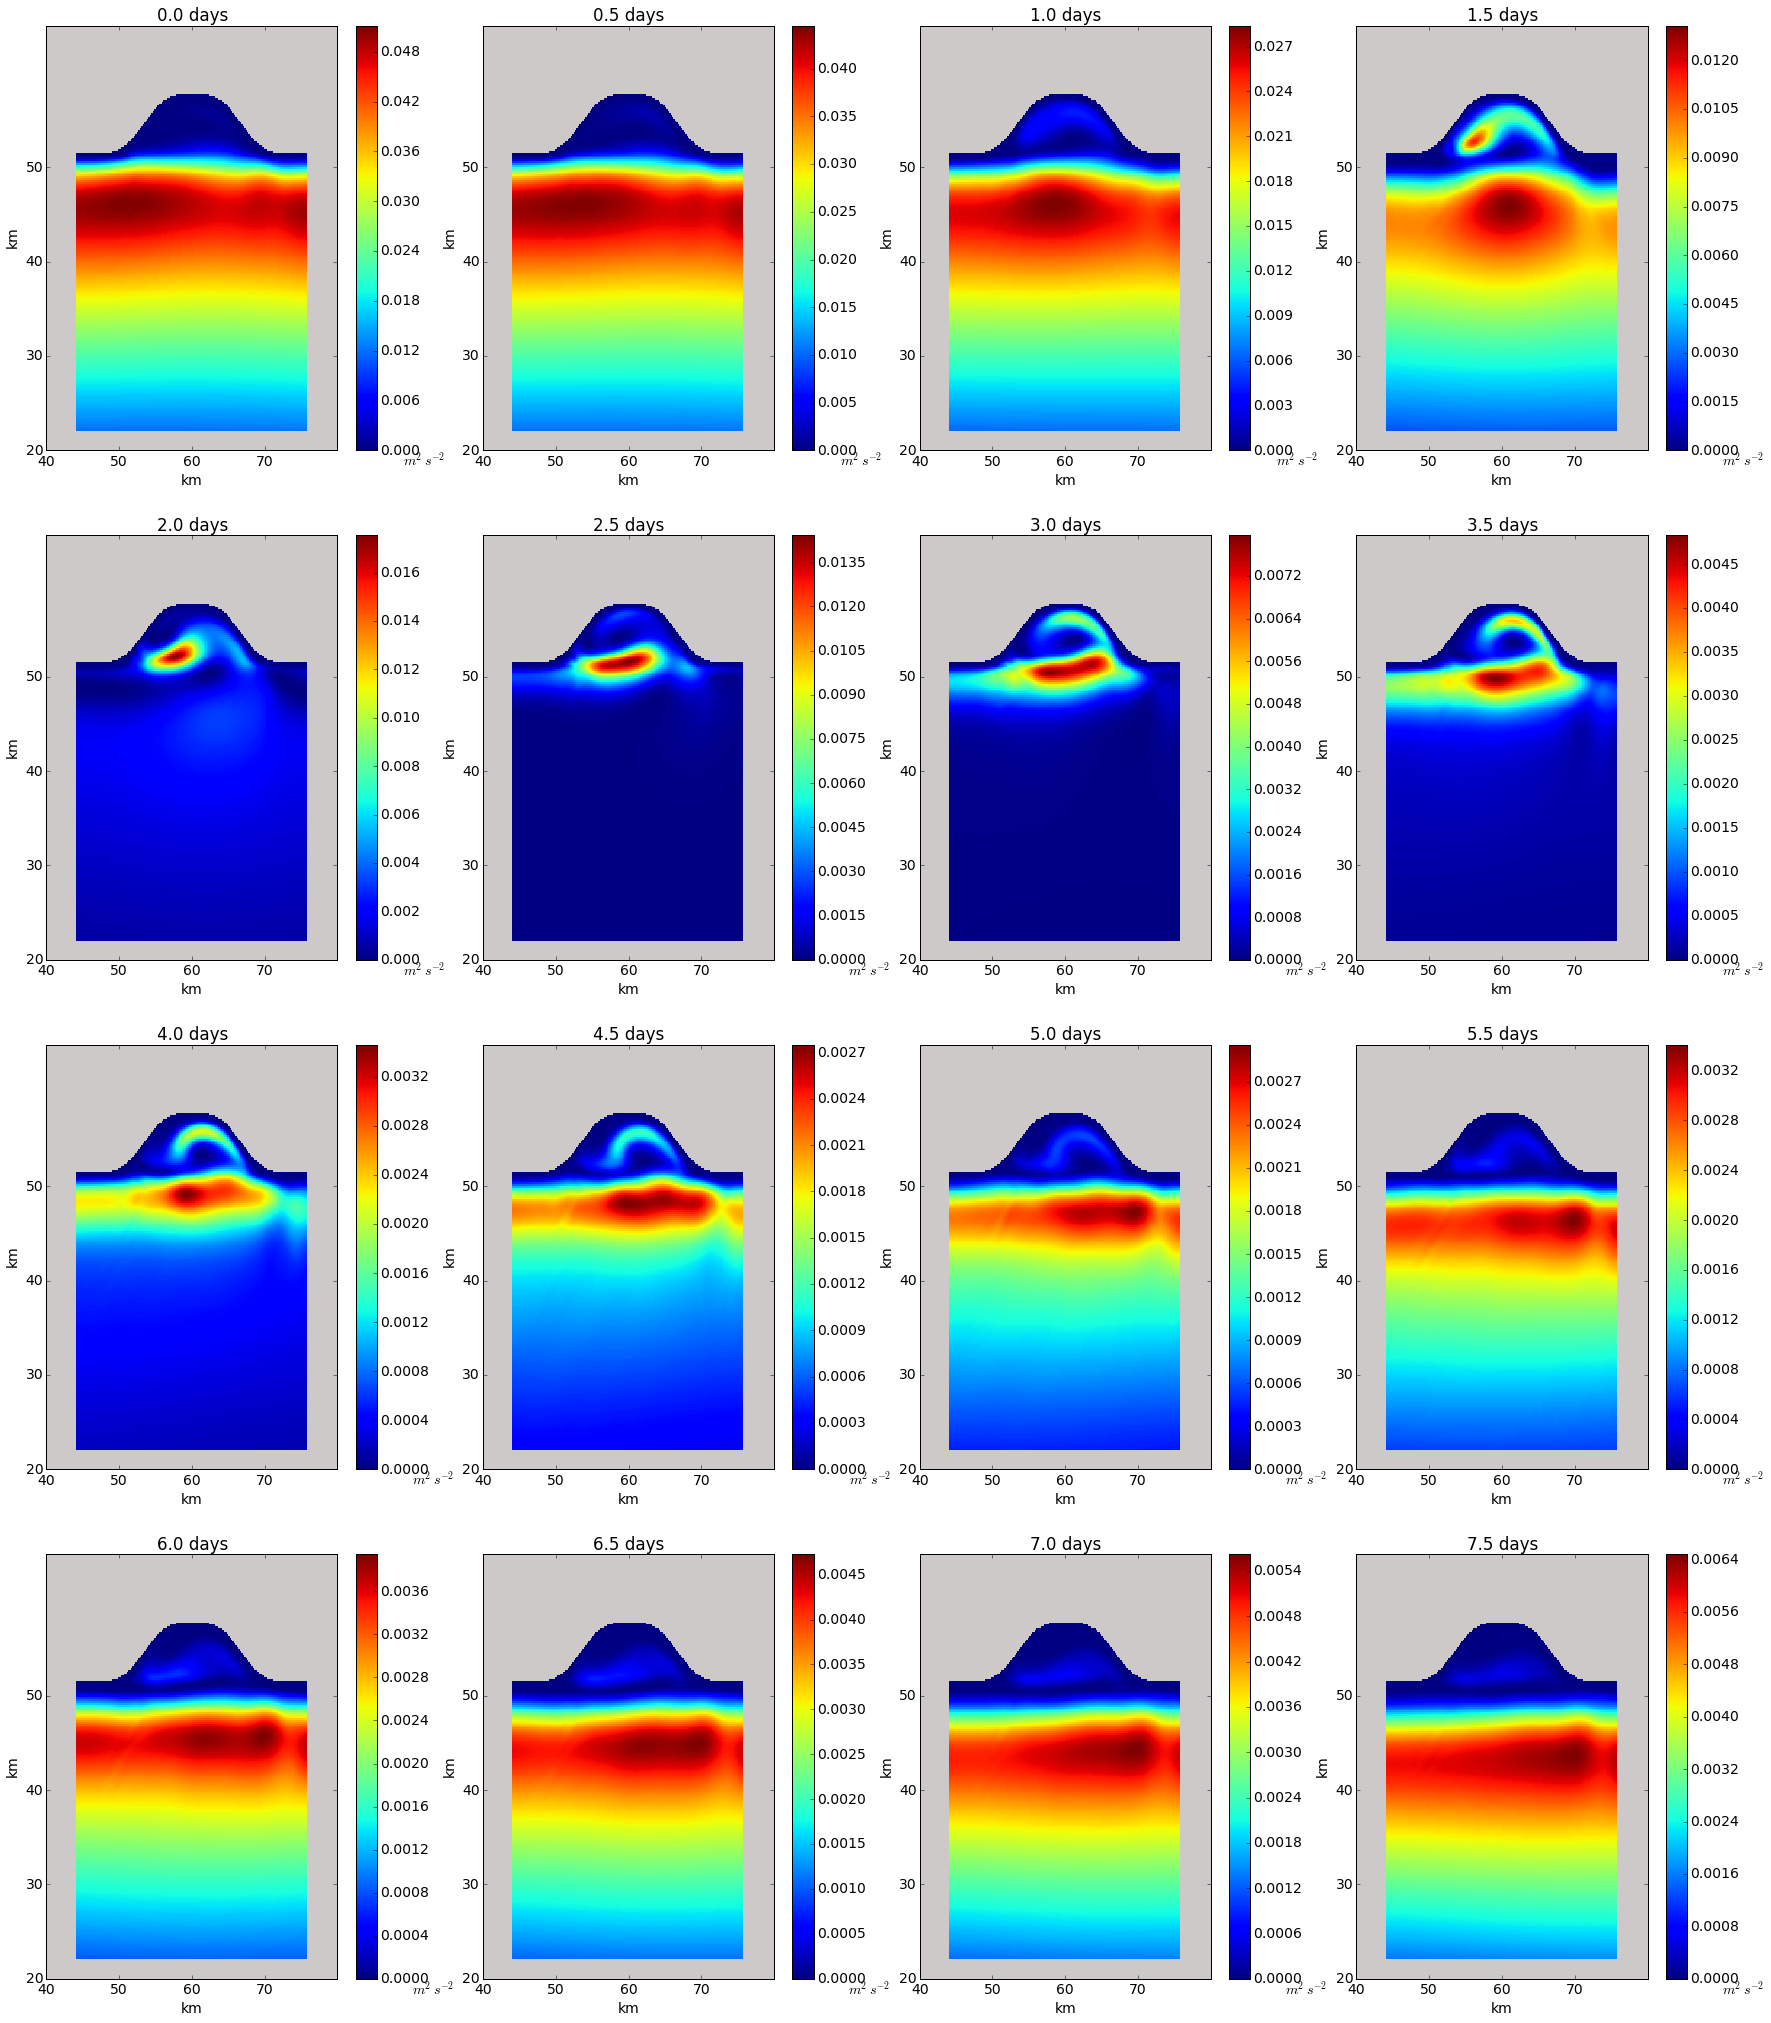

In [74]:
   # PLOT EKE30 zoom

plt.rcParams.update({'font.size':14})

fig46=plt.figure(figsize=(30,35))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE30masked = np.ma.array(EKE30[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[50:-111,100:-101],yc[50:-111,100:-101],EKE30masked[50:-110,100:-100])
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(40000,80000,10000), ['40','50','60','70','80'])
        plt.yticks(np.arange(20000,60000,10000), ['20','30','40','50','60'])

        plt.title("%1.1f days " % (tt/2.0))
        

##Below shelf-break depth 


### **kk = 35 , depth = 185.0 m**

In [75]:
kk = 35 # below SB
print ('Below shelf-break depth is %f m' % (z[35]))

umeant = np.mean(u2,0)
vmeant = np.mean(v2,0)

umeant = np.ma.array(umeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
vmeant = np.ma.array(vmeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])


#### Calculate EKE at kk = 35

EKE35 = np.zeros((ny-1,nx-1,nt))


for tt in range(0,19):
    
    umask = np.ma.array(u2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
    vmask = np.ma.array(v2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])

    # mask u'=u-umean and v'=v-vmean arrays
    ueddy = umask[:,:]-umeant[:,:]
    veddy = vmask[:,:]-vmeant[:,:]
    
    # EKE = 0.5(u'**+v'**)
    EKE =(ueddy**2 + veddy**2)/(2.0)
    EKE35[:,:,tt] = EKE
    
EKEmask = np.ma.getmask(EKE)

Below shelf-break depth is -185.000000 m


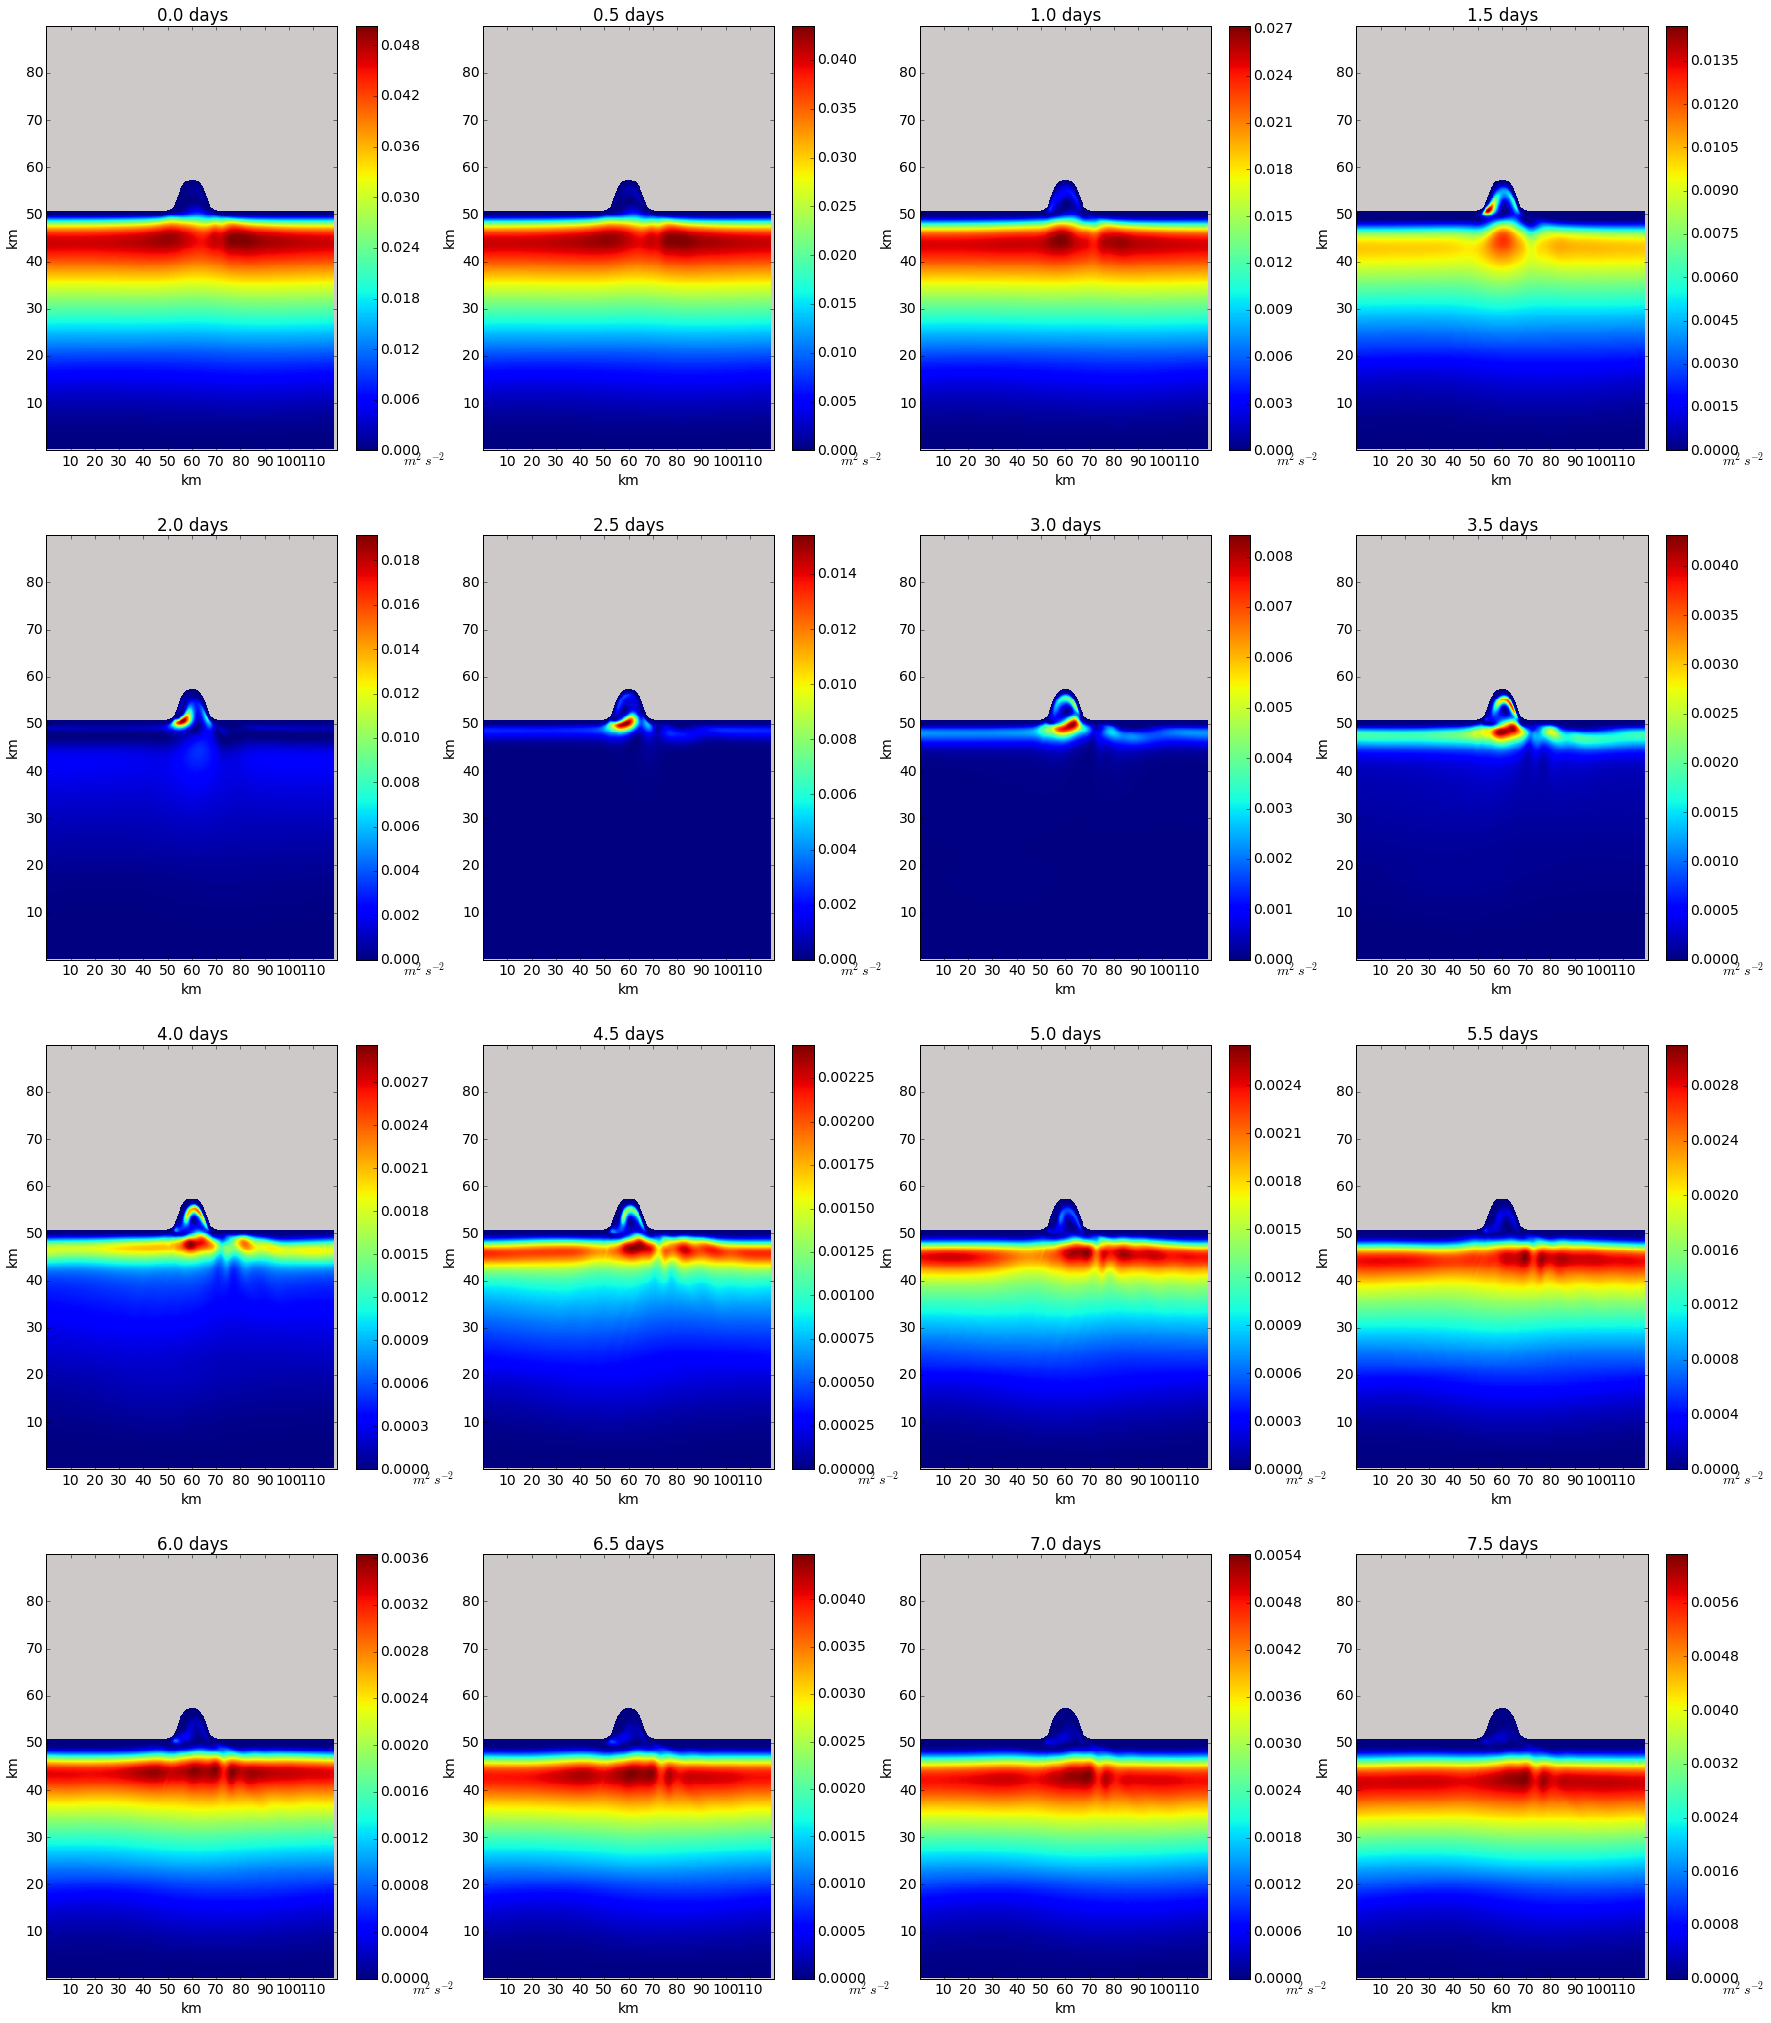

In [76]:
# PLOT EKE35

plt.rcParams.update({'font.size':14})

fig46=plt.figure(figsize=(30,35))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE35masked = np.ma.array(EKE35[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[:-1,:-1],yc[:-1,:-1],EKE35masked)
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
        plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

        plt.title("%1.1f days " % (tt/2.0))

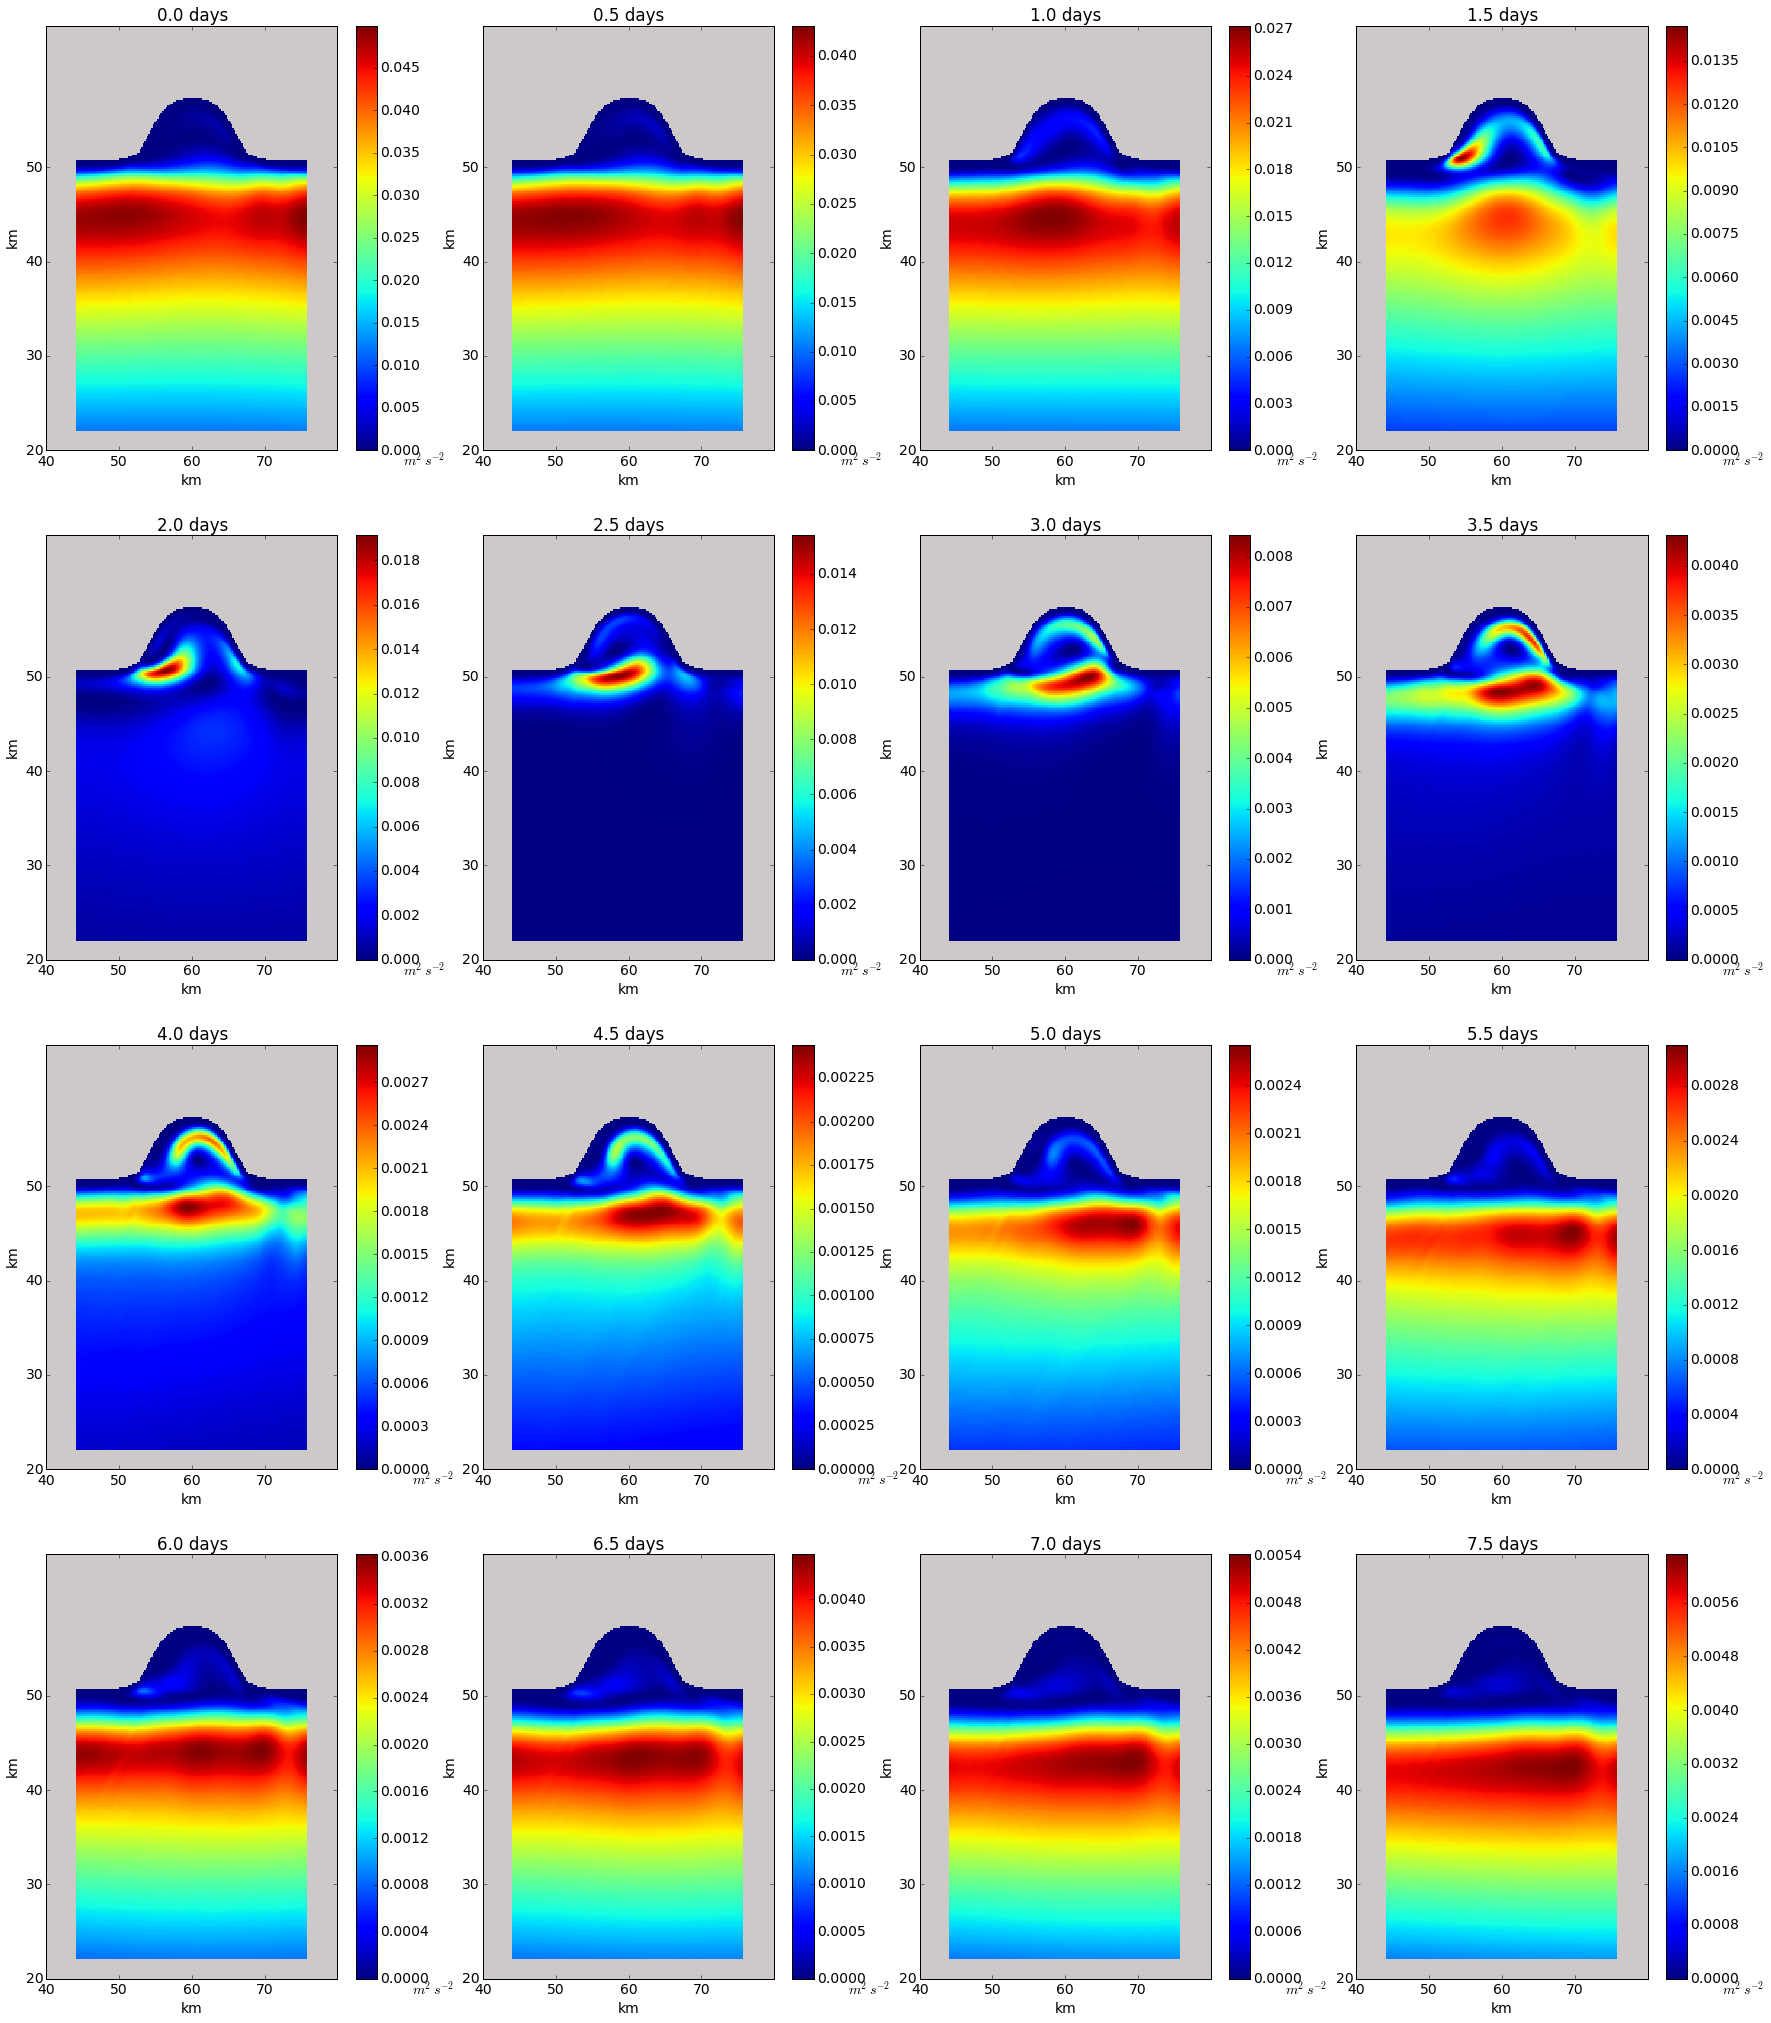

In [77]:
# PLOT EKE35 zoom

plt.rcParams.update({'font.size':14})

fig46=plt.figure(figsize=(30,35))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE35masked = np.ma.array(EKE35[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[50:-111,100:-101],yc[50:-111,100:-101],EKE35masked[50:-110,100:-100])
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(40000,80000,10000), ['40','50','60','70','80'])
        plt.yticks(np.arange(20000,60000,10000), ['20','30','40','50','60'])

        plt.title("%1.1f days " % (tt/2.0))
        

### **kk = 40 , depth = 235.0 m**


In [78]:
kk = 40 # below SB
print ('Below shelf-break depth is %f m' % (z[40]))

umeant = np.mean(u2,0)
vmeant = np.mean(v2,0)

umeant = np.ma.array(umeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
vmeant = np.ma.array(vmeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])


#### Calculate EKE at kk = 40

EKE40 = np.zeros((ny-1,nx-1,nt))


for tt in range(0,19):
    
    umask = np.ma.array(u2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
    vmask = np.ma.array(v2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])

    # mask u'=u-umean and v'=v-vmean arrays
    ueddy = umask[:,:]-umeant[:,:]
    veddy = vmask[:,:]-vmeant[:,:]
    
    # EKE = 0.5(u'**+v'**)
    EKE =(ueddy**2 + veddy**2)/(2.0)
    EKE40[:,:,tt] = EKE
    
EKEmask = np.ma.getmask(EKE)


Below shelf-break depth is -235.000000 m


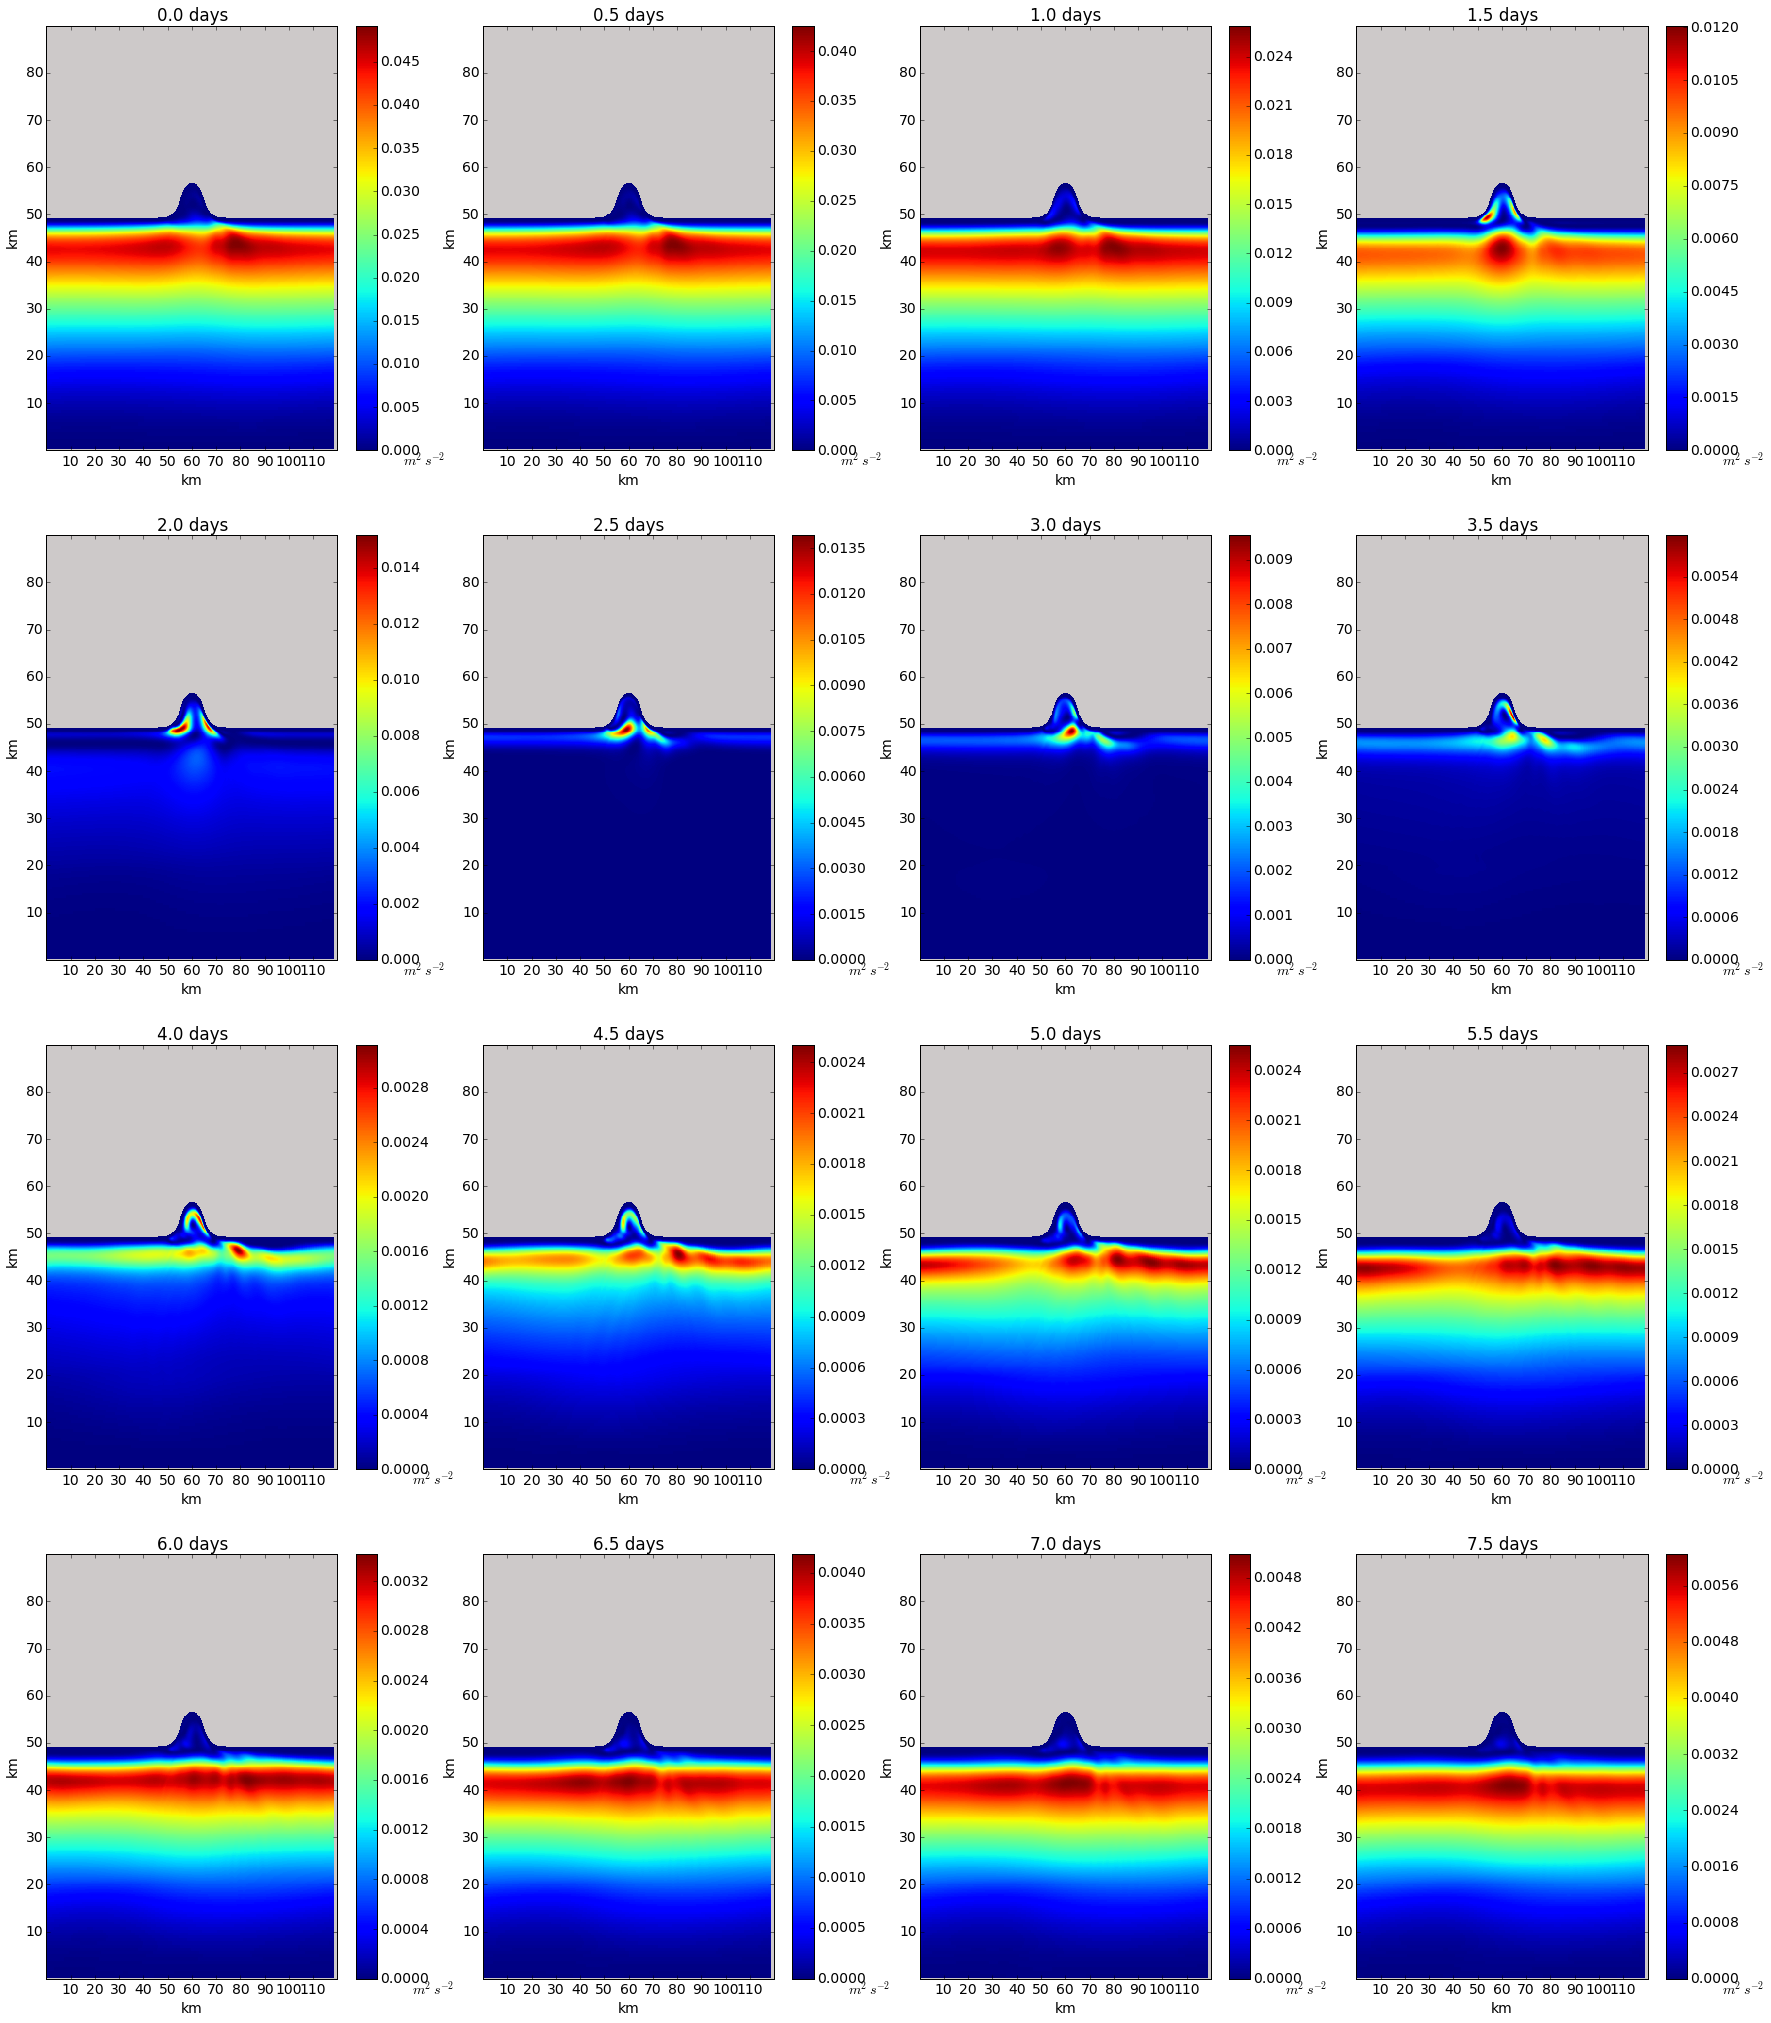

In [79]:
# PLOT EKE40

plt.rcParams.update({'font.size':14})

fig46=plt.figure(figsize=(30,35))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE40masked = np.ma.array(EKE40[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[:-1,:-1],yc[:-1,:-1],EKE40masked)
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
        plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

        plt.title("%1.1f days " % (tt/2.0))
        

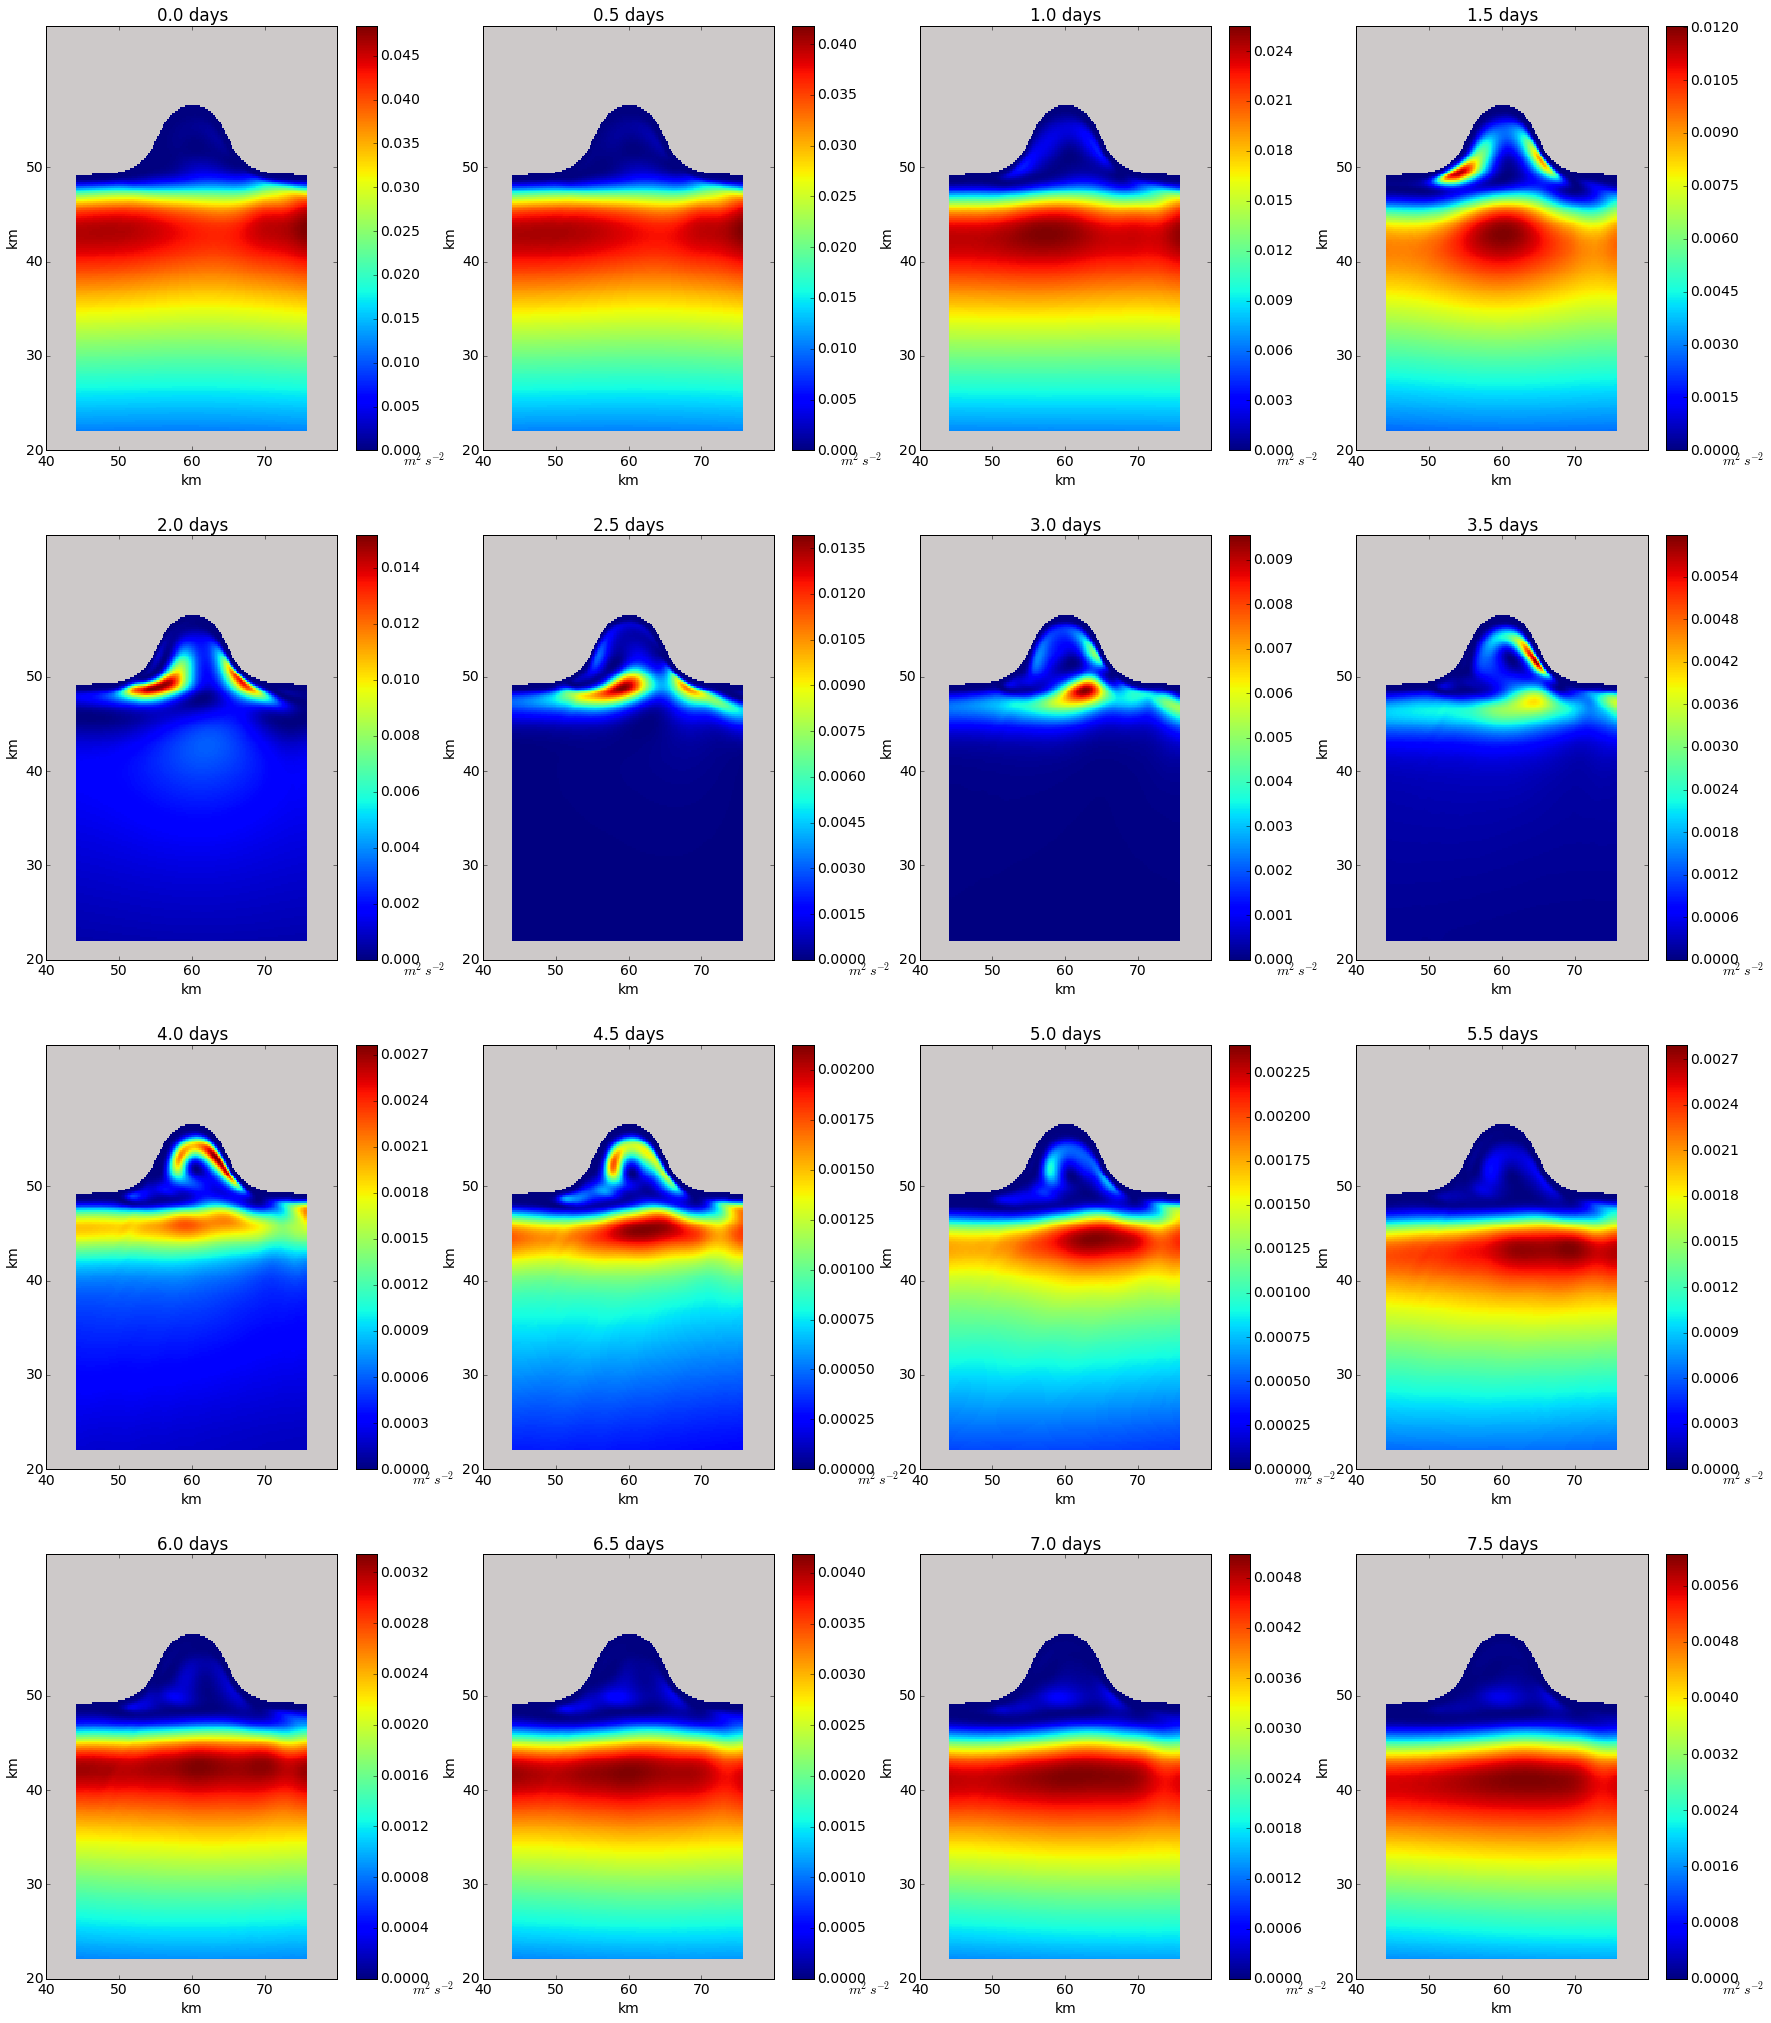

In [80]:
 # PLOT EKE40 zoom

plt.rcParams.update({'font.size':14})

fig46=plt.figure(figsize=(30,35))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE40masked = np.ma.array(EKE40[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[50:-111,100:-101],yc[50:-111,100:-101],EKE40masked[50:-110,100:-100])
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(40000,80000,10000), ['40','50','60','70','80'])
        plt.yticks(np.arange(20000,60000,10000), ['20','30','40','50','60'])

        plt.title("%1.1f days " % (tt/2.0))
        

### **kk = 45 , depth = 310.0 m**


In [81]:
kk = 45 # below SB
print ('Below shelf-break depth is %f m' % (z[45]))

umeant = np.mean(u2,0)
vmeant = np.mean(v2,0)

umeant = np.ma.array(umeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
vmeant = np.ma.array(vmeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])


#### Calculate EKE at kk = 40

EKE45 = np.zeros((ny-1,nx-1,nt))


for tt in range(0,19):
    
    umask = np.ma.array(u2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
    vmask = np.ma.array(v2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])

    # mask u'=u-umean and v'=v-vmean arrays
    ueddy = umask[:,:]-umeant[:,:]
    veddy = vmask[:,:]-vmeant[:,:]
    
    # EKE = 0.5(u'**+v'**)
    EKE =(ueddy**2 + veddy**2)/(2.0)
    EKE45[:,:,tt] = EKE
    
EKEmask = np.ma.getmask(EKE)


Below shelf-break depth is -310.000000 m


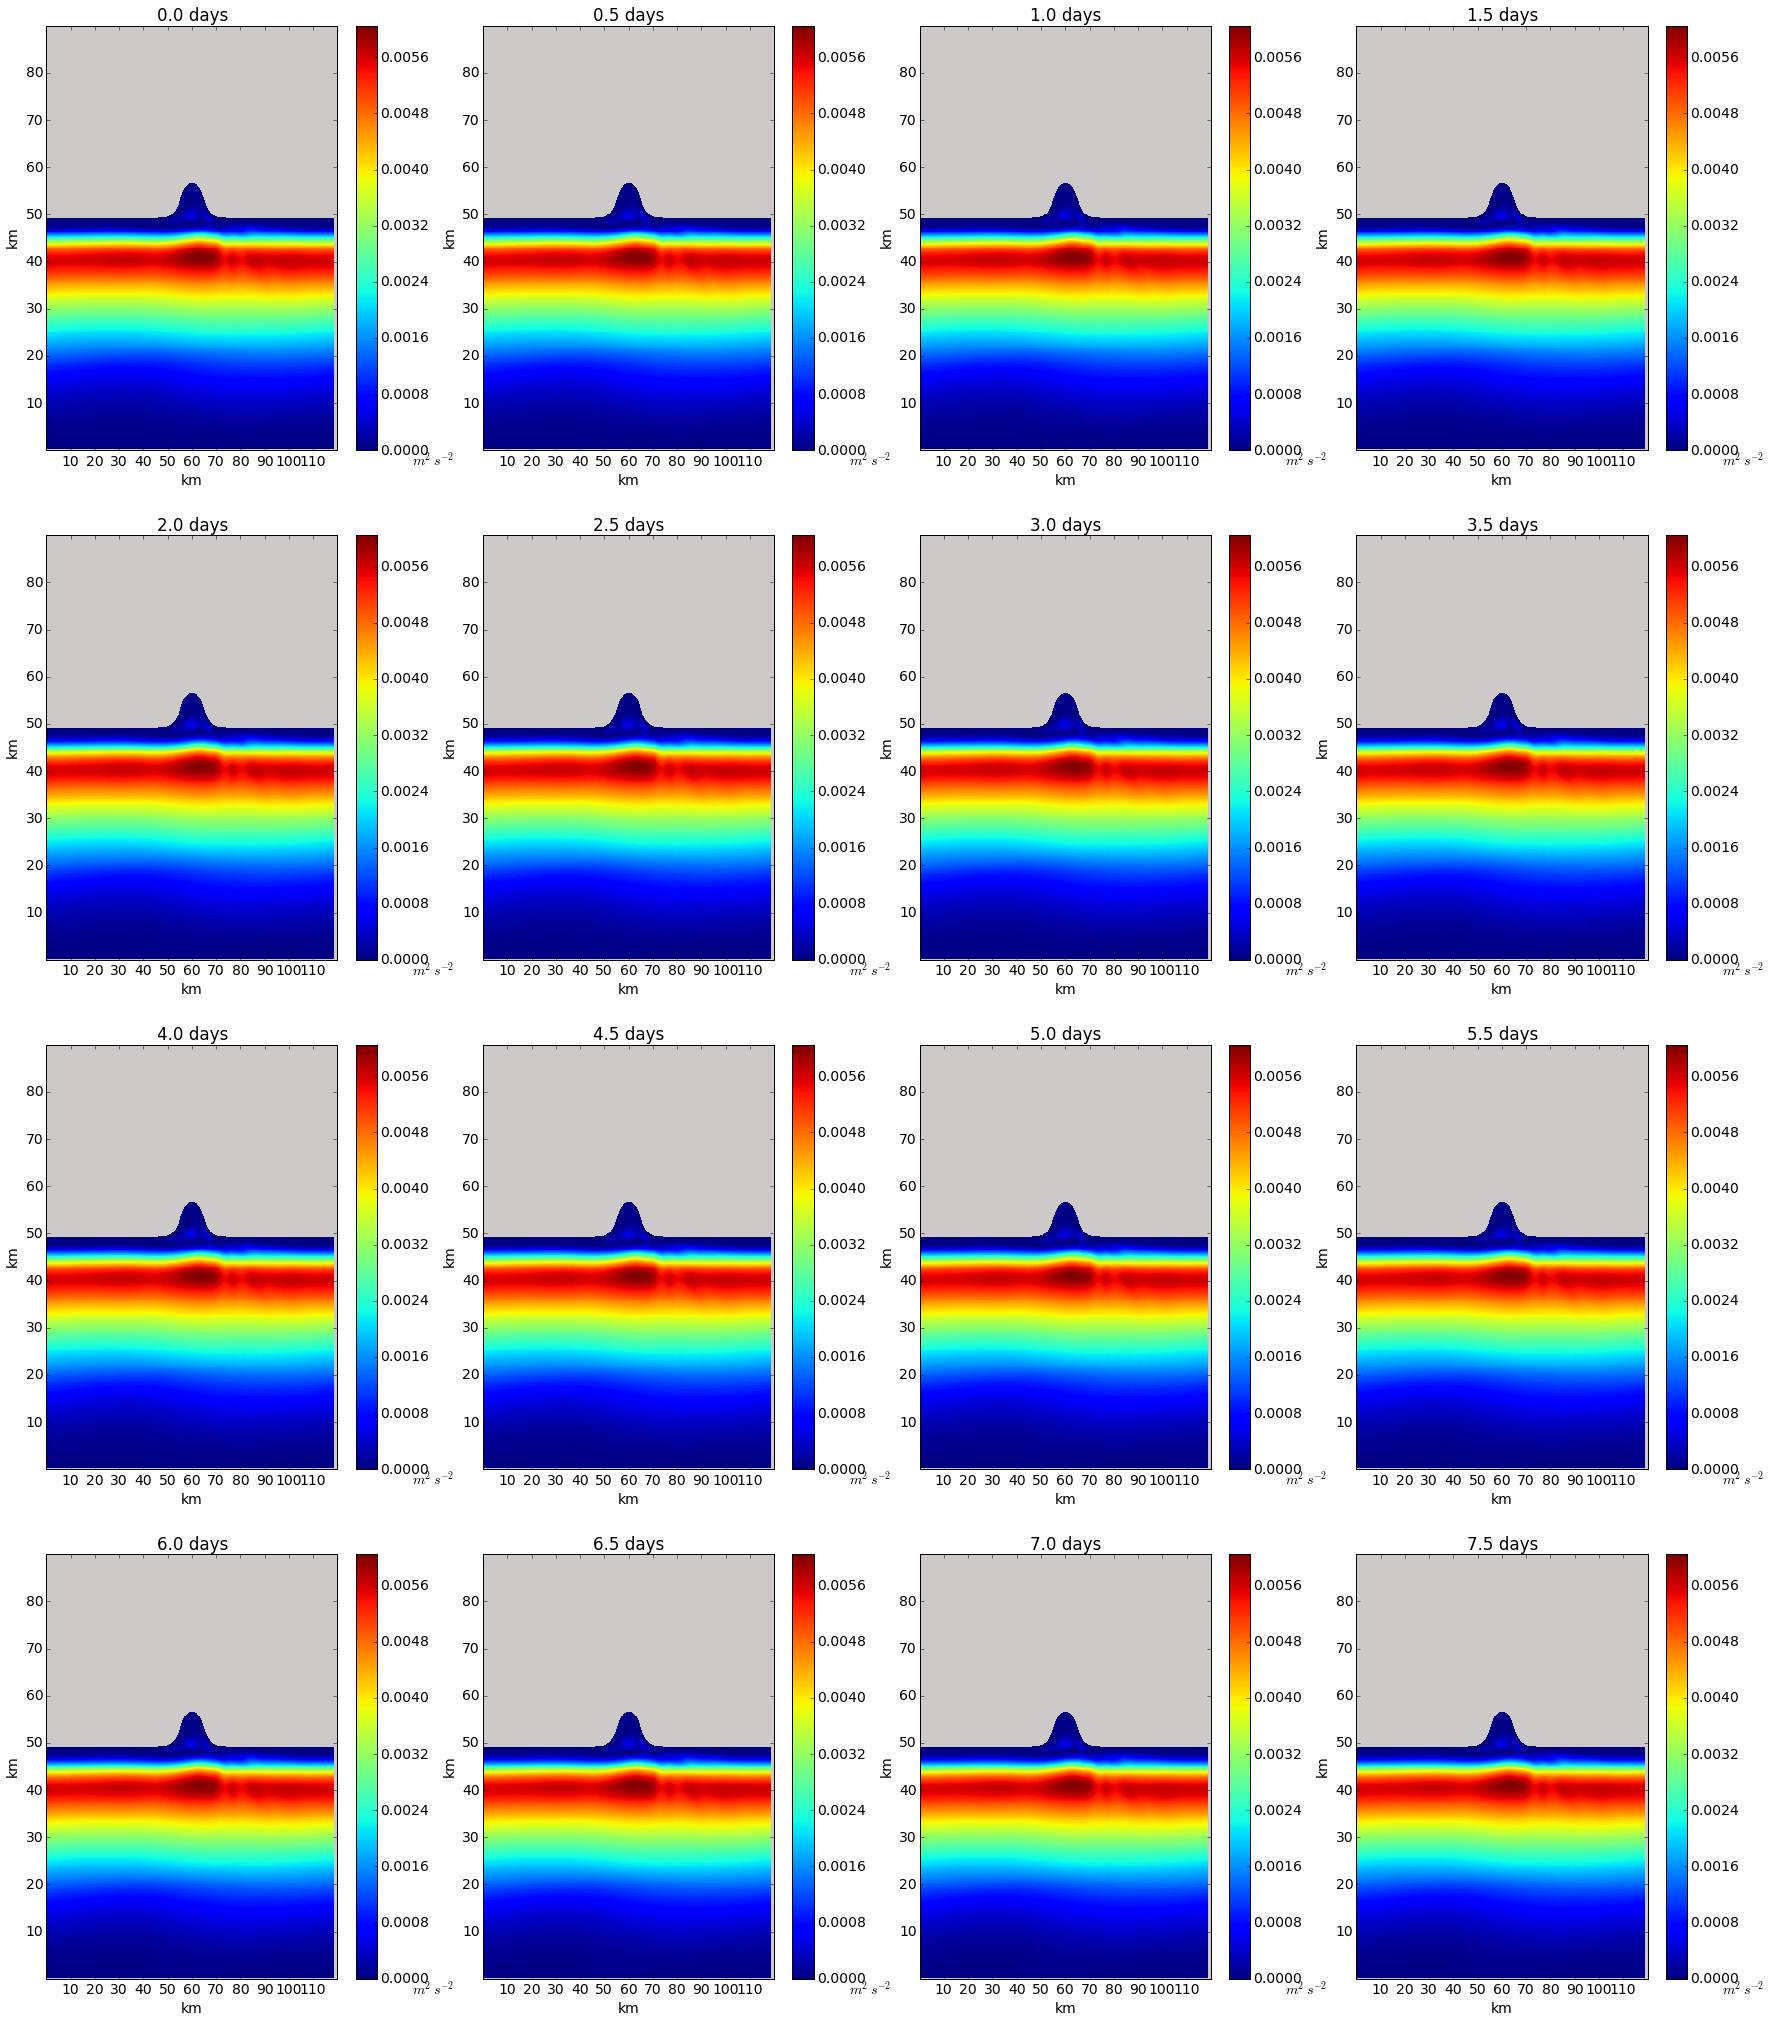

In [82]:
# PLOT EKE45

plt.rcParams.update({'font.size':14})

fig46=plt.figure(figsize=(30,35))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE45masked = np.ma.array(EKE45[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[:-1,:-1],yc[:-1,:-1],EKE40masked)
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
        plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

        plt.title("%1.1f days " % (tt/2.0))
        

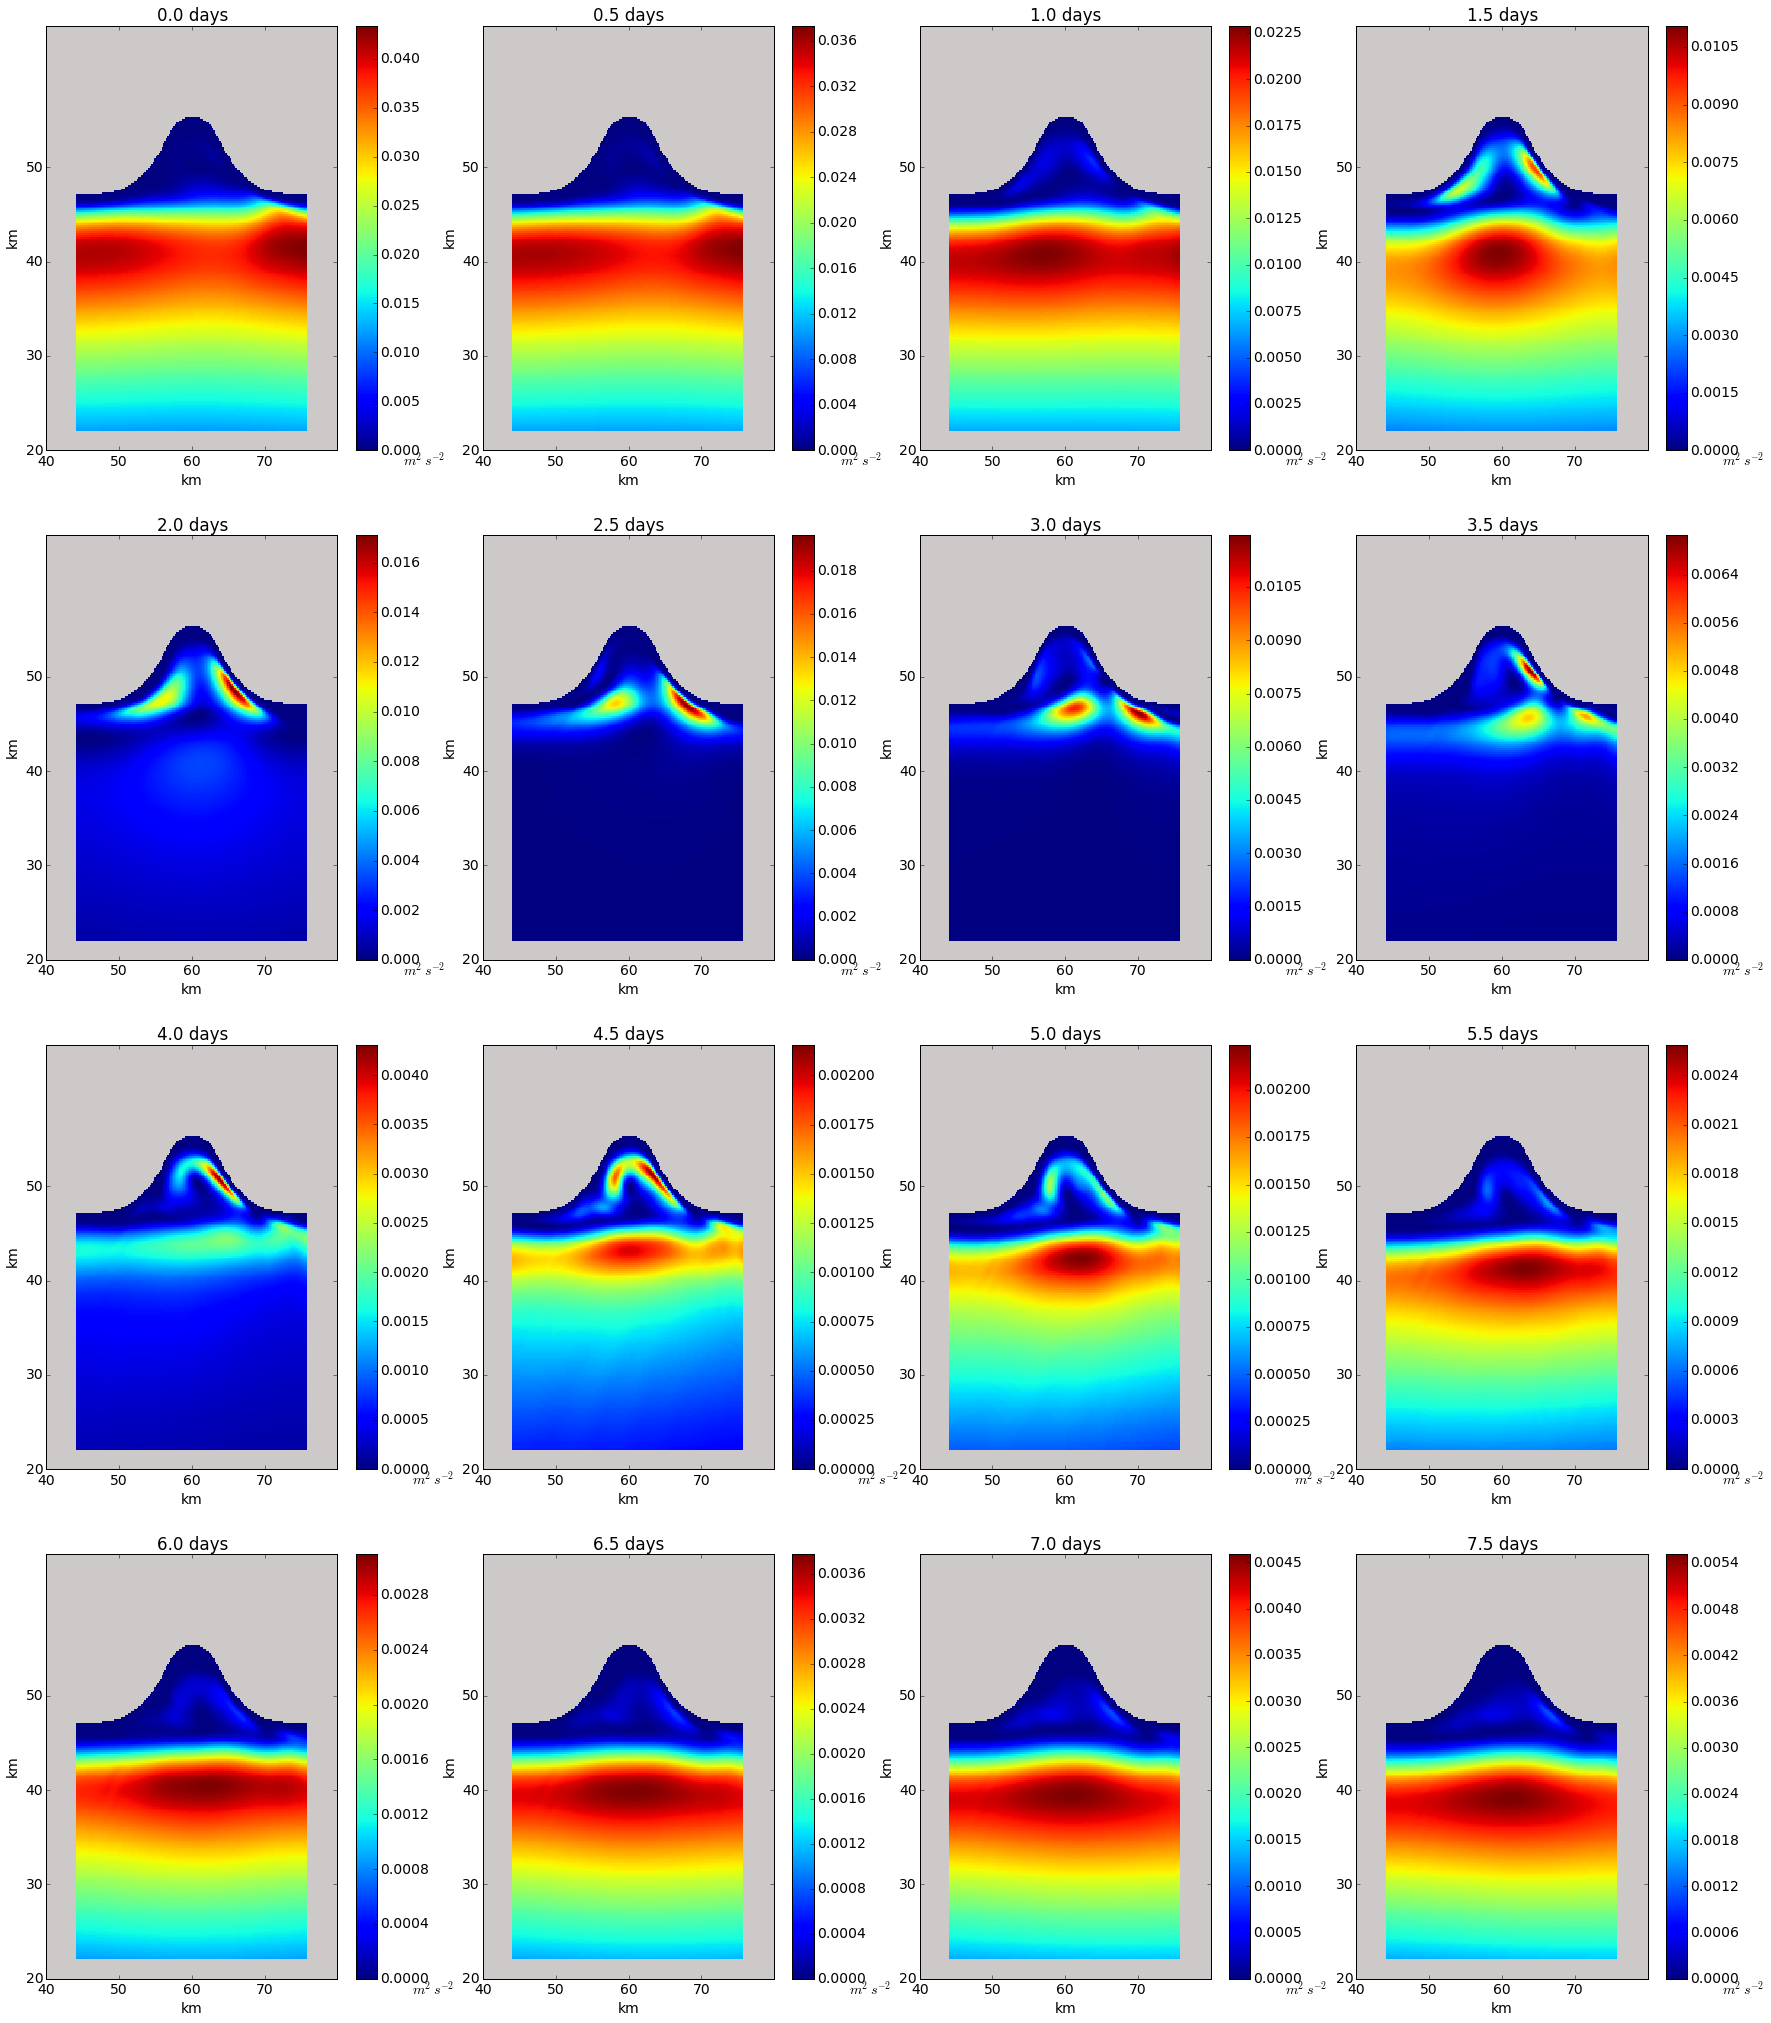

In [83]:
 # PLOT EKE45 zoom

plt.rcParams.update({'font.size':14})

fig46=plt.figure(figsize=(30,35))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE45masked = np.ma.array(EKE45[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[50:-111,100:-101],yc[50:-111,100:-101],EKE45masked[50:-110,100:-100])
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(40000,80000,10000), ['40','50','60','70','80'])
        plt.yticks(np.arange(20000,60000,10000), ['20','30','40','50','60'])

        plt.title("%1.1f days " % (tt/2.0))
        

## Above shelf-break depth

### **kk = 20 , depth = 102.5 m**

In [84]:
kk = 20 # below SB
print ('Below shelf-break depth is %f m' % (z[20]))

umeant = np.mean(u2,0)
vmeant = np.mean(v2,0)

umeant = np.ma.array(umeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
vmeant = np.ma.array(vmeant[kk,:,:],mask=MASKhFacC[kk,:-1,:-1])


#### Calculate EKE at kk = 20

EKE20 = np.zeros((ny-1,nx-1,nt))


for tt in range(0,19):
    
    umask = np.ma.array(u2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])
    vmask = np.ma.array(v2[tt,kk,:,:],mask=MASKhFacC[kk,:-1,:-1])

    # mask u'=u-umean and v'=v-vmean arrays
    ueddy = umask[:,:]-umeant[:,:]
    veddy = vmask[:,:]-vmeant[:,:]
    
    # EKE = 0.5(u'**+v'**)
    EKE =(ueddy**2 + veddy**2)/(2.0)
    EKE20[:,:,tt] = EKE
    
EKEmask = np.ma.getmask(EKE)


Below shelf-break depth is -102.500000 m


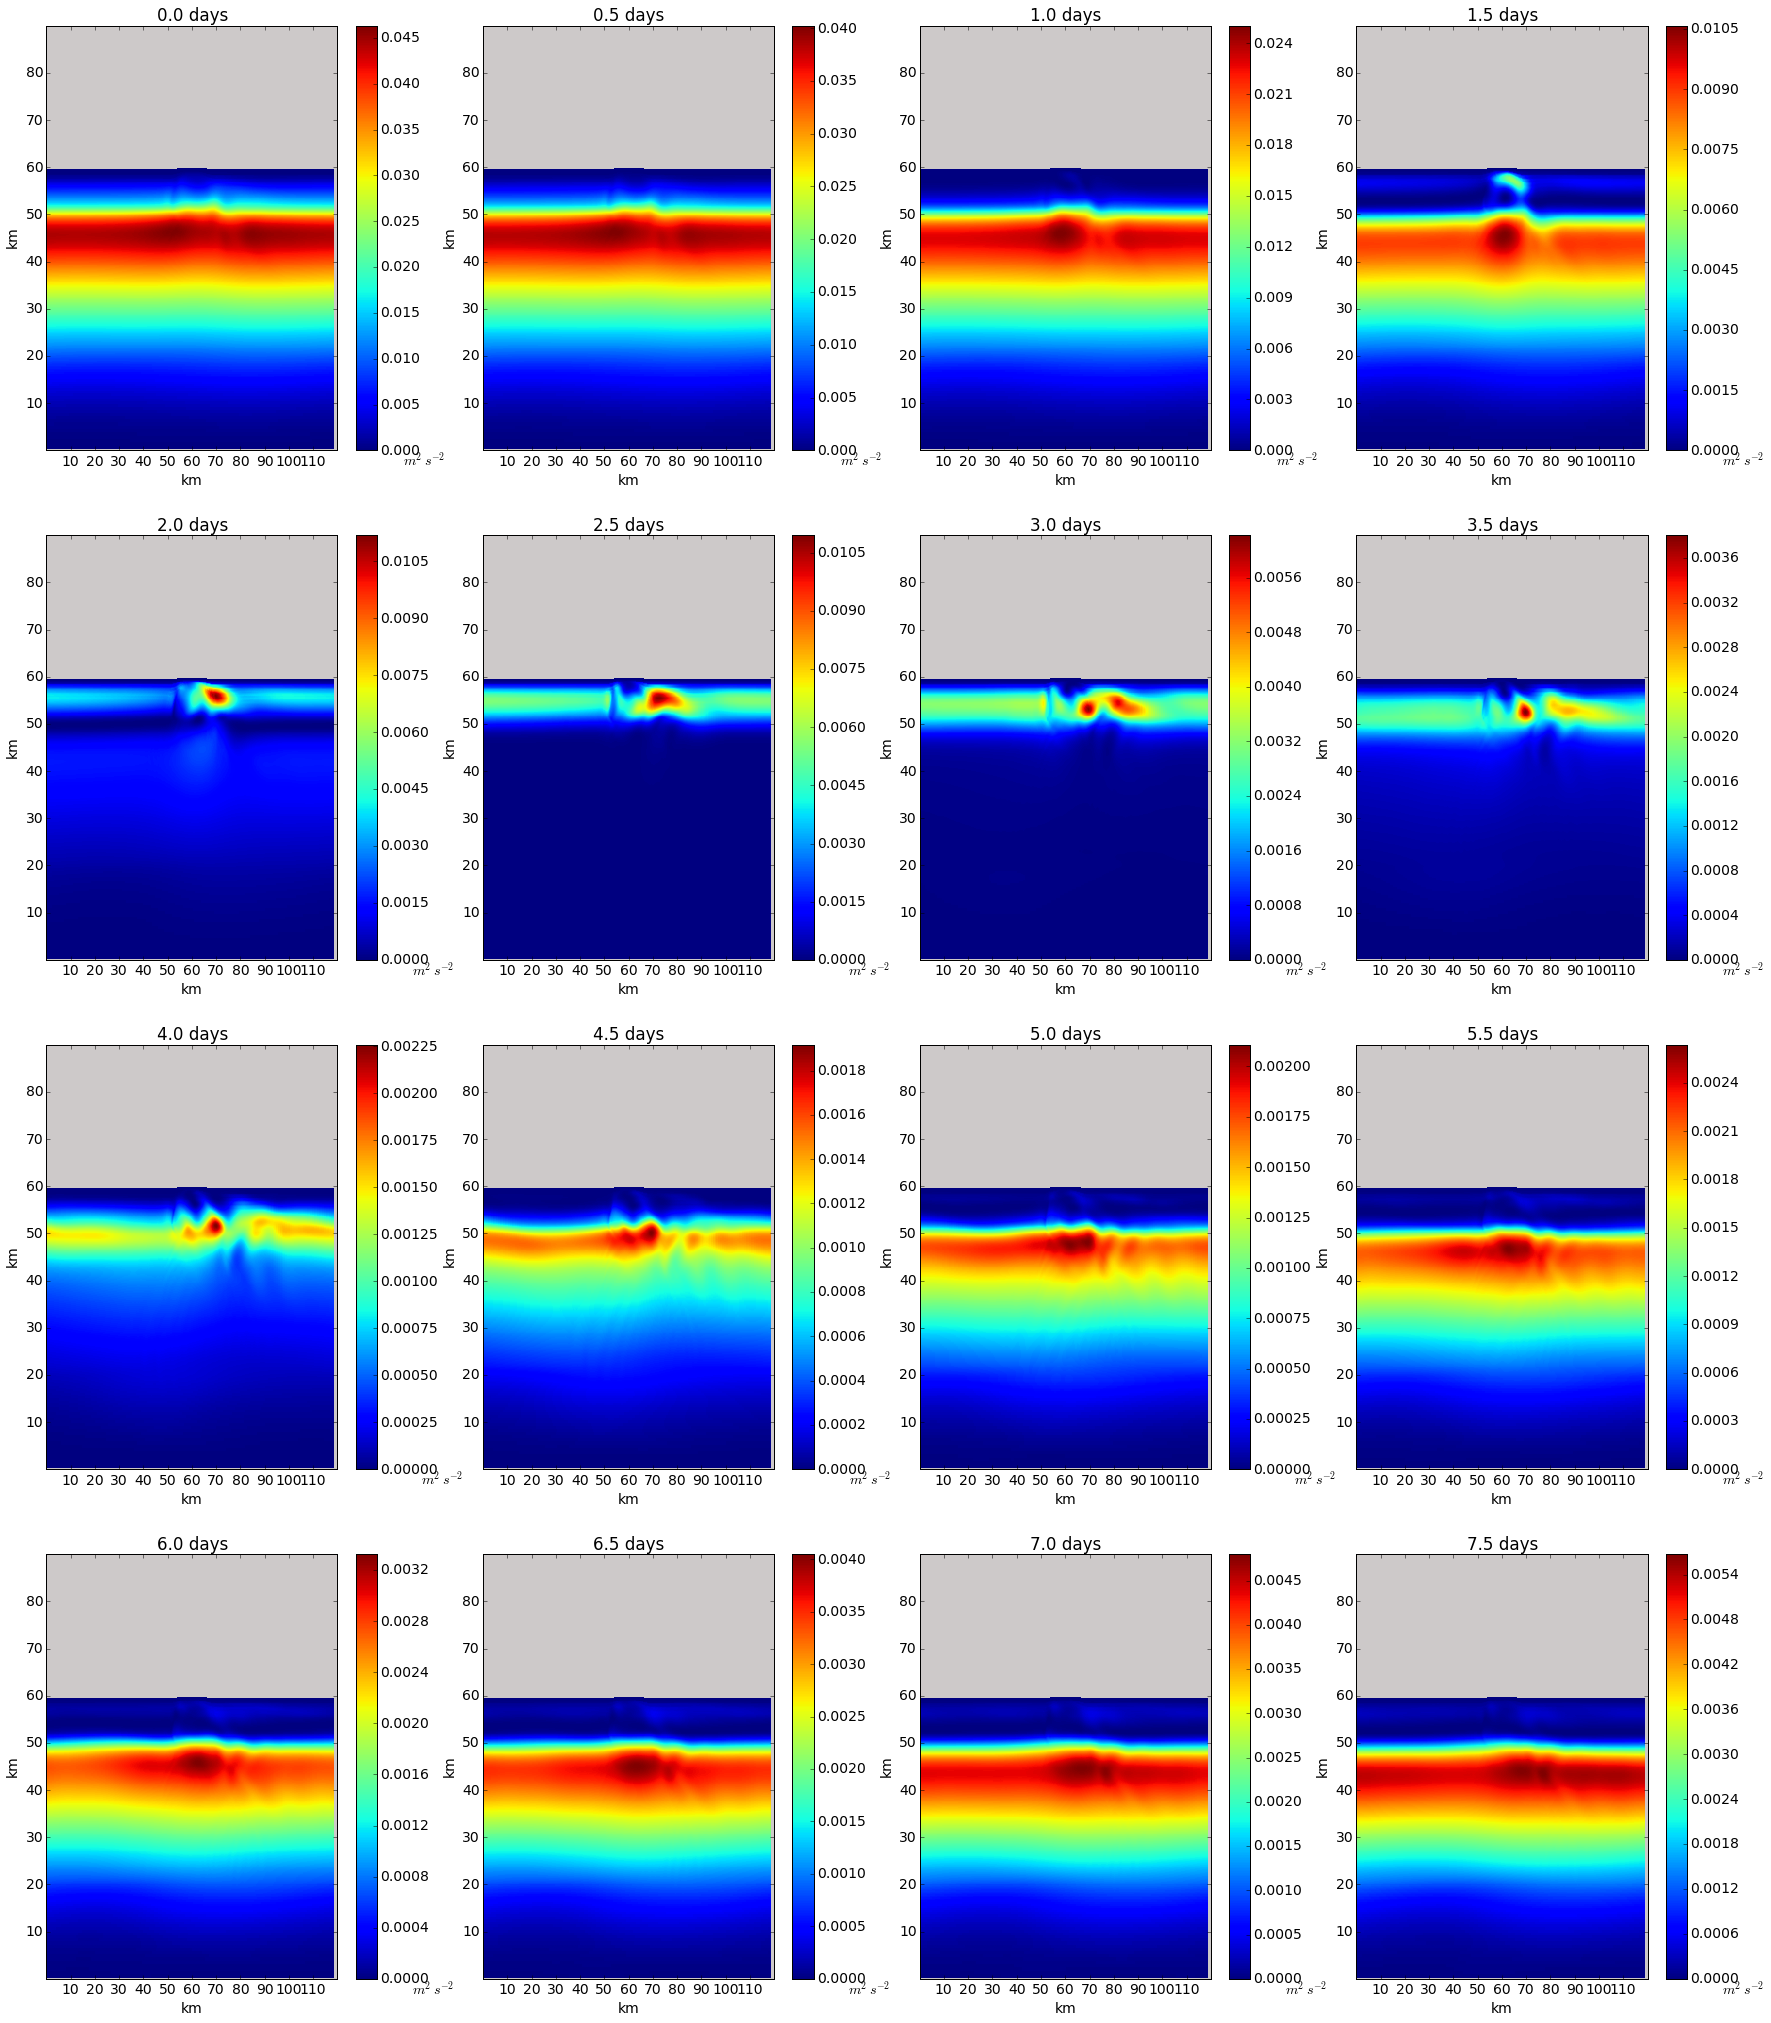

In [85]:
# PLOT EKE20

plt.rcParams.update({'font.size':14})

fig46=plt.figure(figsize=(30,35))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE20masked = np.ma.array(EKE20[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[:-1,:-1],yc[:-1,:-1],EKE20masked)
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(0,120000,10000), [' ','10','20','30','40','50','60','70','80','90','100','110','120'])
        plt.yticks(np.arange(0,90000,10000), [' ','10','20','30','40','50','60','70','80','90'])

        plt.title("%1.1f days " % (tt/2.0))
        

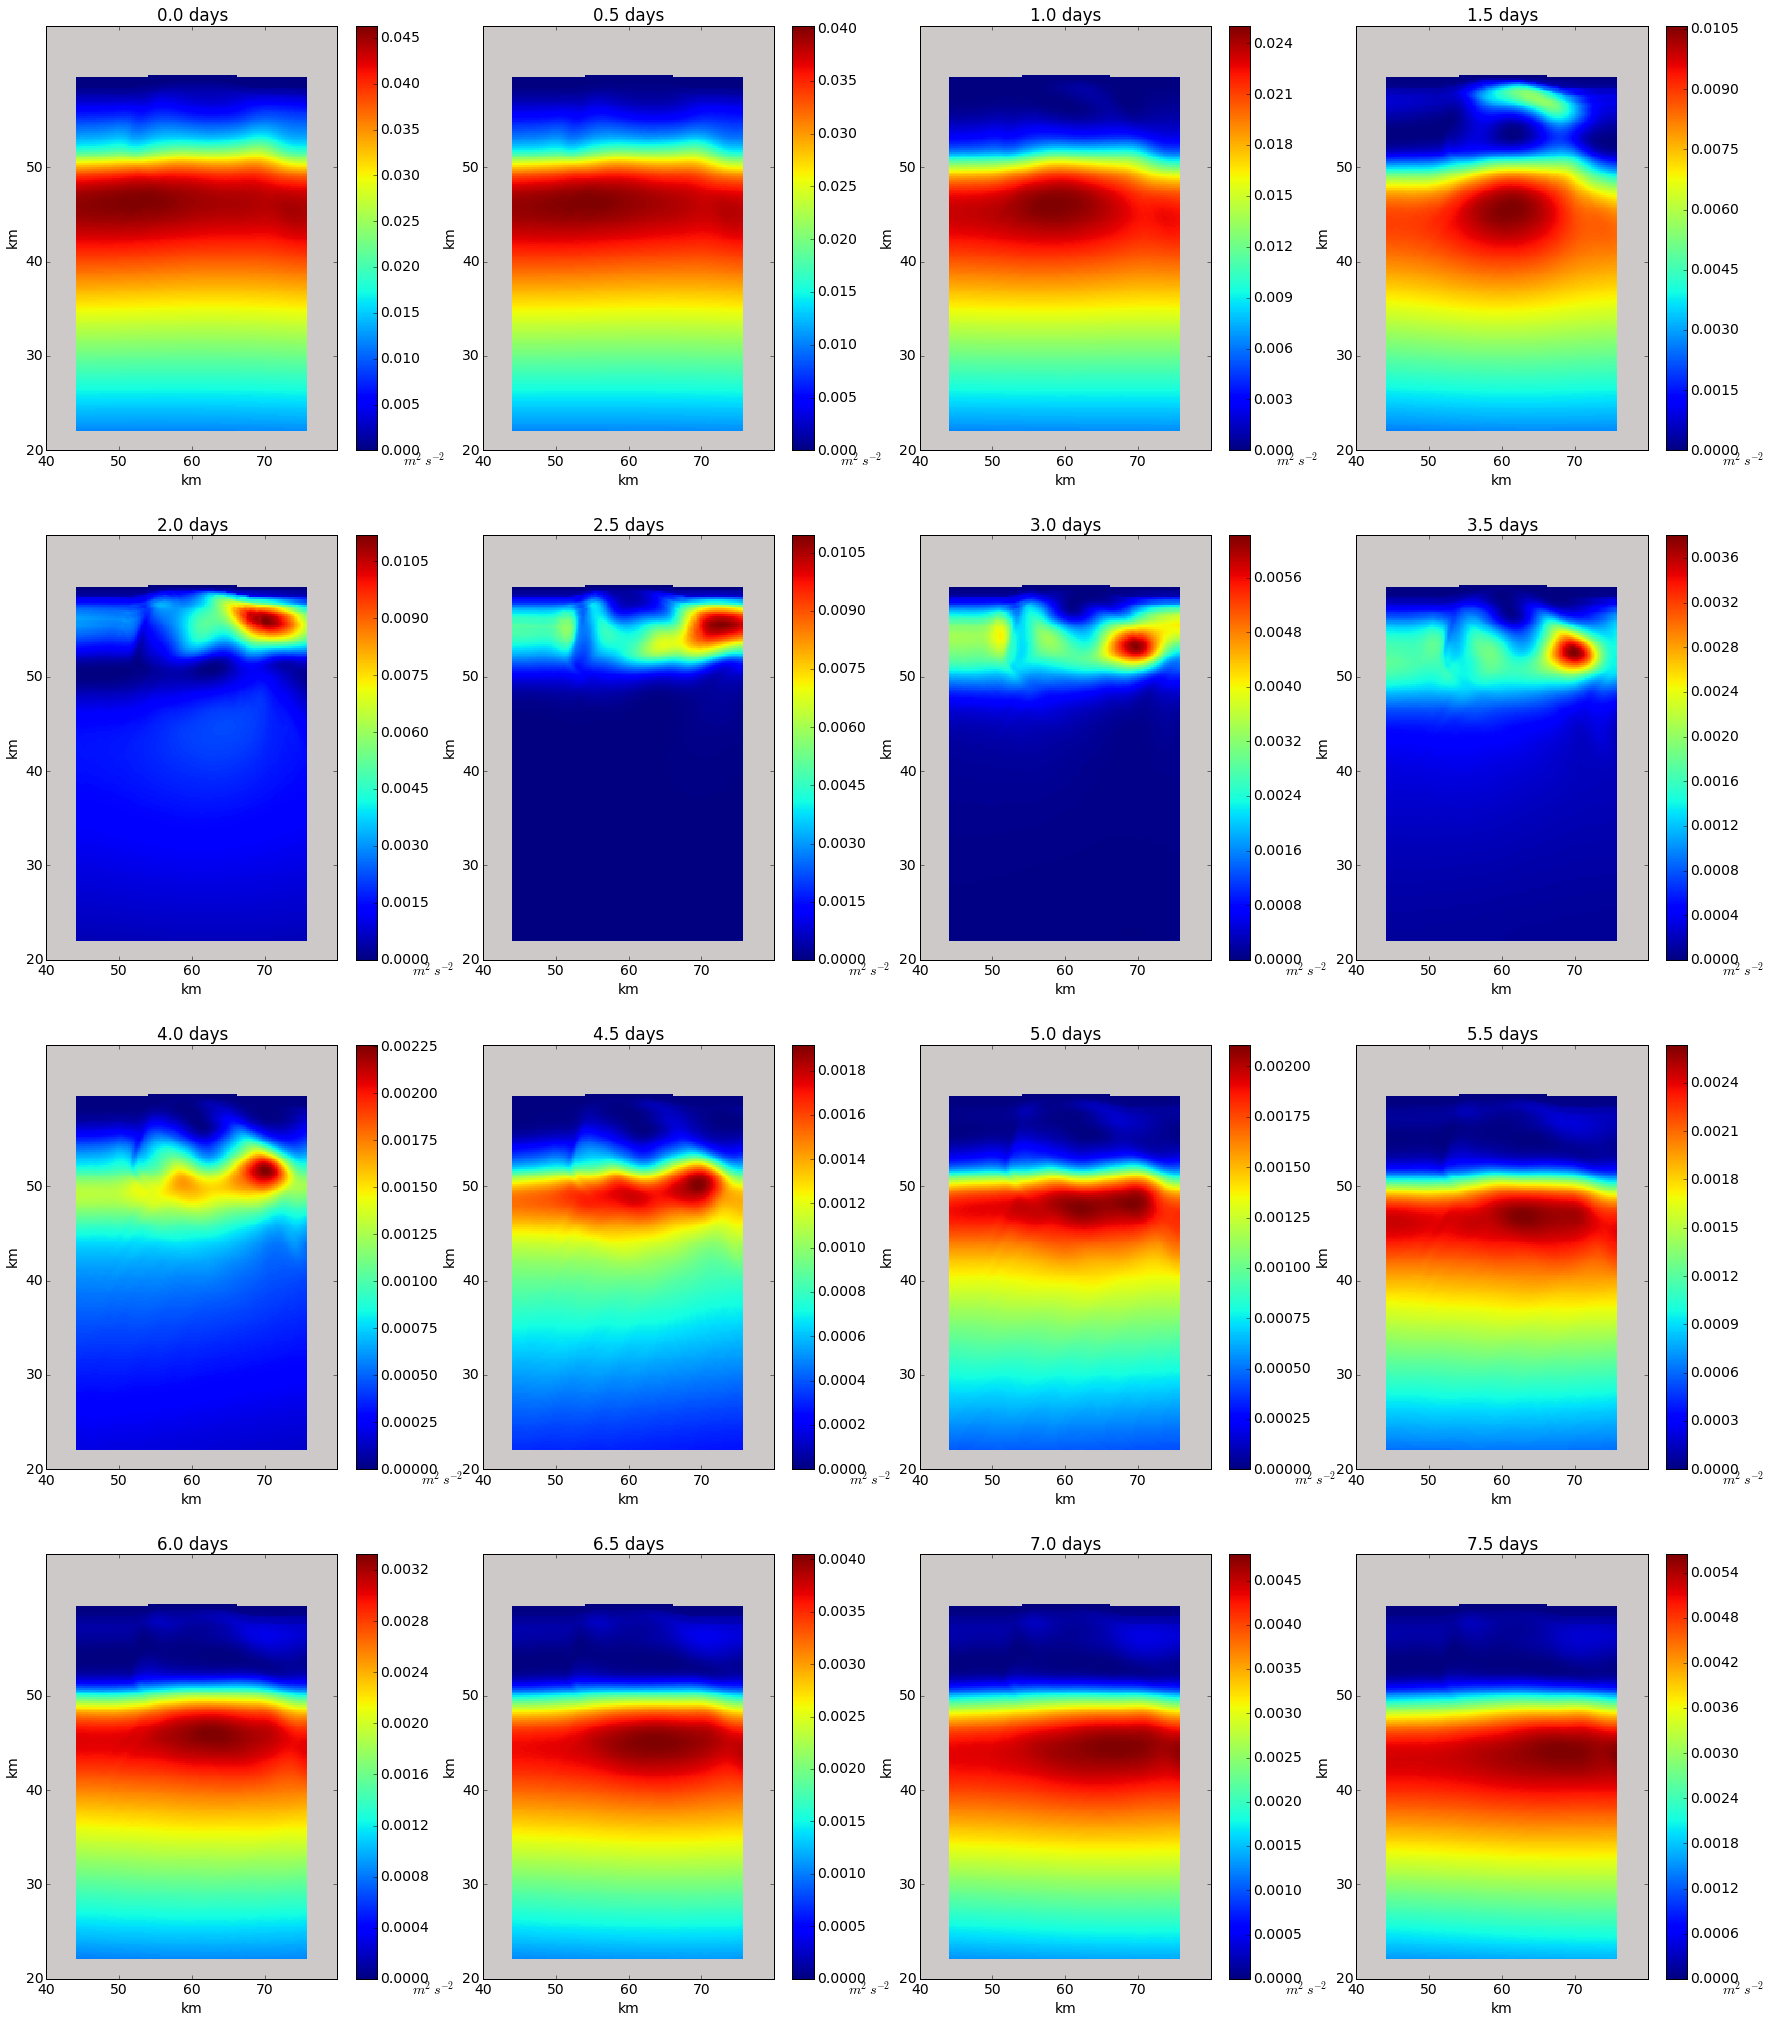

In [86]:
# PLOT EKE20 zoom

plt.rcParams.update({'font.size':14})

fig46=plt.figure(figsize=(30,35))

for tt in range(0,16) :
        
        plt.subplot(4,4,tt+1)
        ax = plt.gca()
        ax.set_axis_bgcolor((205/255.0, 201/255.0, 201/255.0))
        
        EKE20masked = np.ma.array(EKE20[:,:,tt], mask = EKEmask)
        
        plt.pcolor(xc[50:-111,100:-101],yc[50:-111,100:-101],EKE20masked[50:-110,100:-100])
        
        cb = plt.colorbar()
        
        cb.set_label('$m^2s^{-2}$', position=(1, 0),rotation=0)
        
        plt.xlabel('km')
        
        plt.ylabel('km')
       
        plt.xticks(np.arange(40000,80000,10000), ['40','50','60','70','80'])
        plt.yticks(np.arange(20000,60000,10000), ['20','30','40','50','60'])

        plt.title("%1.1f days " % (tt/2.0))
        